<a href="https://colab.research.google.com/github/LatiefDataVisionary/fmcg-gelar-rasa-2025/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:

# # Define the path to your ZIP file in Google Drive
# zip_file_path = '/content/drive/My Drive/Dataset/fmcg_personalcare.zip'
# # Define the directory where the contents will be extracted
# extract_to_path = '/content/drive/My Drive/Dataset/fmcg_personalcare_extracted'

# # Create the extraction directory if it doesn't exist
# os.makedirs(extract_to_path, exist_ok=True)

# # Unzip the file
# print(f"Attempting to extract '{zip_file_path}' to '{extract_to_path}'...")
# try:
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to_path)
#     print(f"Successfully extracted '{zip_file_path}' to '{extract_to_path}'.")
# except FileNotFoundError:
#     print(f"Error: The zip file '{zip_file_path}' was not found. Please ensure it exists at this path.")
#     raise
# except zipfile.BadZipFile:
#     print(f"Error: '{zip_file_path}' is not a valid zip file. Please check the file's integrity.")
#     raise

# # Now, define the folder path where your CSVs are located *inside* the extracted content.
# # Assuming the zip file contains a top-level folder also named 'fmcg_personalcare'
# folder_path = os.path.join(extract_to_path, 'fmcg_personalcare')

# # Verify the extracted folder exists before proceeding
# if not os.path.isdir(folder_path):
#     print(f"Error: The expected extracted directory '{folder_path}' was not found after unzipping. ")
#     print(f"Please check the contents of the extracted folder '{extract_to_path}'. Current contents: {os.listdir(extract_to_path)}")
#     raise NotADirectoryError(f"Extracted folder '{folder_path}' not found.")


# # List all CSV files in the folder
# csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# # Load each CSV file into a separate DataFrame
# datasets = {}
# if not csv_files:
#     print(f"No CSV files found in '{folder_path}'. Please check the directory contents.")
# else:
#     for file in csv_files:
#         file_path = os.path.join(folder_path, file)
#         df_name = os.path.splitext(file)[0] # Use filename without extension as DataFrame name
#         datasets[df_name] = pd.read_csv(file_path)
#         print(f"Loaded '{file}' into DataFrame '{df_name}'. First 20 rows:")
#         display(datasets[df_name].head(20))
#         print("\n")

#  **Analisis Prediktif & Peramalan Tren Penjualan FMCG - Kompetisi Gelar Rasa 2025**

---

### **Tim Analisis Data**

*   **Nama Tim**: `[TULIS NAMA TIM ANDA DI SINI]`
*   **Universitas**: `[TULIS NAMA UNIVERSITAS ANDA]`
*   **Anggota Tim**:
    1.  `[Nama Lengkap Anggota 1]`
    2.  `[Nama Lengkap Anggota 2]`
    3.  `[Nama Lengkap Anggota 3]`

---

### 🚀 **Project Description (Deskripsi Proyek)**

Proyek ini merupakan submisi untuk **Data Science Competition "Gelar Rasa 2025"** yang diselenggarakan oleh Himpunan Mahasiswa Sains Data (HIMASADA) UPN "Veteran" Jawa Timur. Mengusung tema kompetisi, ***"Revealing Hidden Patterns for Innovation and Strategic Growth in the Digital Era"***, analisis ini bertujuan untuk menyelami dataset sintetis transaksi penjualan produk FMCG kategori *Personal Care* guna mengungkap pola-pola tersembunyi yang dapat ditransformasikan menjadi *insight* bisnis strategis.

Dengan memanfaatkan data historis dan prediktif dari tahun 2020 hingga 2025, proyek ini akan berfokus pada tiga pilar analisis utama yang menjadi inti dari *case study* kompetisi:

1.  **💡 Innovation Radar (Radar Inovasi)**
    Menganalisis performa produk secara individual dan agregat untuk mengidentifikasi "bintang baru" (*rising stars*) di pasar. Analisis ini akan menyoroti produk dengan potensi pertumbuhan penjualan tertinggi, atribut produk (seperti merek atau ukuran) yang paling diminati, serta korelasi antara kampanye pemasaran dengan traksi pasar sebuah produk.

2.  **📈 Trend Forecasting (Peramalan Tren)**
    Mengembangkan model *machine learning* yang robust untuk meramalkan tren penjualan di masa mendatang. Fokusnya tidak hanya pada volume penjualan, tetapi juga pada pemahaman pergeseran preferensi konsumen antar *channel* penjualan (misalnya, pergeseran dari *offline* ke *online*) dan antar wilayah. Hasil peramalan ini dapat menjadi landasan fundamental bagi perusahaan dalam merencanakan strategi inventaris, pemasaran, dan alokasi sumber daya.

3.  **🔄 Product Cannibalization Analysis (Analisis Kanibalisasi Produk)**
    Melakukan studi kasus untuk mengevaluasi secara kuantitatif apakah peluncuran produk baru memberikan dampak negatif (*cannibalization*) terhadap penjualan produk-produk yang sudah ada dalam portofolio yang sama. Analisis ini akan memberikan rekomendasi berbasis data mengenai strategi peluncuran produk agar dapat memaksimalkan pertumbuhan kategori secara keseluruhan.

> Tujuan akhir dari proyek ini adalah untuk menyajikan sebuah narasi data yang komprehensif, mulai dari eksplorasi dan pemodelan hingga interpretasi hasil, yang berpuncak pada rekomendasi bisnis yang cerdas, inovatif, dan relevan untuk pertumbuhan strategis di era digital yang sangat kompetitif.

### 📊 **Dataset Description (Deskripsi Dataset)**

Dataset yang menjadi dasar analisis ini adalah **"FMCG Personal Care - Synthetic Dataset"**. Dataset ini dirancang untuk mensimulasikan pola transaksi nyata di industri *Fast-Moving Consumer Goods* (FMCG) untuk kategori perawatan pribadi, dengan cakupan data dari **1 Januari 2020 hingga 31 Desember 2025**. Dataset terdiri dari empat file CSV utama yang saling berhubungan:

**1. `sales.csv` (Data Transaksi Penjualan)**
-   Merupakan dataset inti yang berisi **~1.000.000 baris** data transaksional.
-   **Kolom-kolom kunci**:
    -   `transaction_id`: ID unik untuk setiap transaksi.
    -   `date`: Tanggal transaksi (format YYYY-MM-DD).
    -   `product_id`: Kunci untuk menghubungkan dengan data produk.
    -   `region`: Wilayah/kota tempat terjadinya transaksi.
    -   `channel`: Saluran penjualan (misalnya, Shopee, Alfamart, Official Store).
    -   `units_sold`: Jumlah unit produk yang terjual dalam satu transaksi.
    -   `avg_price`: Harga rata-rata per unit setelah diskon (dalam IDR).
    -   `discount_pct`: Persentase diskon yang diterapkan.
    -   `revenue`: Total pendapatan dari transaksi (`units_sold` * `avg_price`).

**2. `products.csv` (Data Master Produk)**
-   Berisi informasi detail untuk setiap produk unik.
-   **Kolom-kolom kunci**:
    -   `product_id`: ID unik produk.
    -   `product_name`: Nama lengkap produk.
    -   `brand`: Merek dari produk.
    -   `type`: Jenis produk (misalnya, Shampoo, Body Wash).
    -   `size_ml`: Ukuran produk dalam mililiter.
    -   `base_price`: Harga dasar produk sebelum diskon.
    -   `launch_date`: Tanggal resmi peluncuran produk.

**3. `marketing.csv` (Data Kampanye Pemasaran)**
-   Menyediakan data terkait aktivitas pemasaran untuk produk tertentu.
-   **Kolom-kolom kunci**:
    -   `campaign_id`: ID unik kampanye.
    -   `product_id`: Produk yang menjadi fokus kampanye.
    -   `spend`: Biaya yang dikeluarkan untuk kampanye (dalam IDR).
    -   `channel`: Saluran pemasaran (misalnya, TV, Influencer, Instagram).
    -   `engagement_rate`: Metrik keterlibatan dari kampanye.

**4. `reviews.csv` (Data Ulasan Pelanggan)**
-   Berisi sampel **~10.000 ulasan** dari pelanggan.
-   **Kolom-kolom kunci**:
    -   `product_id`: Produk yang diulas.
    -   `rating`: Peringkat yang diberikan pelanggan (skala 1-5).
    -   `sentiment`: Sentimen dari ulasan (Positive, Negative, Neutral).
    -   `comment`: Teks singkat ulasan.

Kombinasi dari keempat dataset ini menyediakan ekosistem data yang kaya, memungkinkan kita untuk melakukan analisis dari berbagai sudut pandang—mulai dari performa penjualan, efektivitas pemasaran, hingga persepsi pelanggan—untuk menjawab tantangan kompetisi.

---
*Dengan pemahaman ini, kita siap untuk memulai tahap **Setup & Initialization**.*

## **Chapter 0: Setup & Initialization (Pengaturan & Inisialisasi Proyek)**

Di bab ini, kita akan mempersiapkan lingkungan kerja, mengimpor semua library yang diperlukan, dan memuat seluruh dataset ke dalam DataFrame pandas.



### **Sub-chapter 0.1 Import Libraries(Mengimpor Library)**

**Tujuan**: Mengimpor semua library Python yang akan kita gunakan sepanjang proyek.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from google.colab import drive
drive.mount('/content/drive')

# Memastikan tampilan plot inline
%matplotlib inline

# Konfigurasi tampilan pandas agar tidak terpotong
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Semua library yang diperlukan telah berhasil diimpor.")

Mounted at /content/drive
Semua library yang diperlukan telah berhasil diimpor.


### **Sub-chapter 0.2 Data Loading(Memuat Dataset)**

**Tujuan**: Memuat keempat file CSV ke dalam DataFrame pandas yang terpisah.


In [2]:
# Path ke folder utama hasil ekstraksi
base_extracted_path = '/content/drive/My Drive/Dataset/fmcg_personalcare_extracted'
# Path ke subfolder yang berisi file CSV
data_folder = os.path.join(base_extracted_path, 'fmcg_personalcare')

In [3]:
# Memuat products.csv
products = pd.read_csv(os.path.join(data_folder, 'products.csv'))
print("\n--- products.csv ---")
products['launch_date'] = pd.to_datetime(products['launch_date'])
products.info()
display(products.head(10))


--- products.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_id    15 non-null     object        
 1   product_name  15 non-null     object        
 2   brand         15 non-null     object        
 3   type          15 non-null     object        
 4   size_ml       15 non-null     int64         
 5   base_price    15 non-null     int64         
 6   launch_date   15 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 972.0+ bytes


,product_id,product_name,brand,type,size_ml,base_price,launch_date
0,PC001,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15
1,PC002,Sunsilk Black Shine Conditioner 340ml,Sunsilk,Conditioner,340,33000,2020-06-10
2,PC003,Lifebuoy Total10 Body Wash 400ml,Lifebuoy,Body Wash,400,28000,2020-03-20
3,PC004,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000,2021-05-01
4,PC005,Dove Deep Moisture Lotion 200ml,Dove,Lotion,200,35000,2021-11-12
5,PC006,Dove Intense Repair Shampoo 340ml,Dove,Shampoo,340,36000,2022-01-25
6,PC007,Rexona Men Ice Cool Spray 150ml,Rexona,Deodorant,150,40000,2022-06-02
7,PC008,Rexona Women Shower Clean Roll-on 50ml,Rexona,Deodorant,50,28000,2023-02-14
8,PC009,Clear Cool Sport Menthol 340ml,Clear,Shampoo,340,34000,2020-09-20
9,PC010,Love Beauty & Planet Coconut Water Shampoo 400ml,Love Beauty & Planet,Shampoo,400,42000,2023-03-18


In [4]:
# Memuat sales.csv dan langsung mengubah kolom 'date' menjadi tipe data datetime
sales = pd.read_csv(os.path.join(data_folder, 'sales.csv'))
print("\n--- sales.csv ---")
sales['date'] = pd.to_datetime(sales['date'])
sales.info()
display(sales.head(10))


--- sales.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   transaction_id     1000000 non-null  object        
 1   date               1000000 non-null  datetime64[ns]
 2   product_id         1000000 non-null  object        
 3   region             1000000 non-null  object        
 4   channel            1000000 non-null  object        
 5   units_sold         1000000 non-null  int64         
 6   avg_price          1000000 non-null  float64       
 7   discount_pct       1000000 non-null  int64         
 8   revenue            1000000 non-null  float64       
 9   days_since_launch  1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 76.3+ MB


,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch
0,fa43024c-7c61-4e2b-bfd1-84915e86c4f7,2024-02-04,PC001,Semarang,Shopee,4,31721.61,5,126886.45,1450
1,cc02b941-61b7-4e37-b385-ecfc2fe2a0b0,2022-05-31,PC004,Medan,Tokopedia,4,23148.20,0,92592.80,395
2,378b66ac-8b18-43e3-8b91-cfbb0ee1d346,2020-10-24,PC013,Palembang,Alfamart,5,25396.69,20,126983.43,-1178
3,42ff9d7e-aba8-4444-b144-3ed288c3ae2c,2023-05-31,PC001,Medan,Tokopedia,7,30006.83,0,210047.84,1201
4,605dfc68-c347-406e-b6af-2bb43cabc515,2024-05-06,PC009,Medan,Tokopedia,2,30927.25,5,61854.50,1324
5,c0c9d9e6-0865-4299-af7e-ca37b161a641,2022-02-15,PC011,Semarang,Alfamart,6,32571.44,0,195428.66,-54
6,e336ef92-9cd3-46d6-9fb2-70783d97a647,2020-12-06,PC012,Surabaya,Hypermarket,3,28423.59,5,85270.76,-242
7,f63d8554-1cf2-4115-8d98-2336b593c194,2025-10-10,PC011,Semarang,Shopee,2,32644.78,0,65289.56,1279
8,aef6d180-e4b5-4af7-a7b5-cf51dc688996,2022-06-03,PC013,Makassar,Official Store,6,31150.26,0,186901.54,-591
9,1a366324-8ca0-4aea-9535-a833f20caf8a,2025-08-25,PC006,Denpasar,Indomaret,2,30105.10,10,60210.20,1308


In [5]:
# Memuat marketing.csv
marketing = pd.read_csv(os.path.join(data_folder, 'marketing.csv'))
print("\n--- marketing.csv ---")
marketing['start_date'] = pd.to_datetime(marketing['start_date'])
marketing['end_date'] = pd.to_datetime(marketing['end_date'])
marketing.info()
display(marketing.head(10))


--- marketing.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   campaign_id      20 non-null     object        
 1   product_id       20 non-null     object        
 2   campaign_name    20 non-null     object        
 3   start_date       20 non-null     datetime64[ns]
 4   end_date         20 non-null     datetime64[ns]
 5   spend_idr        20 non-null     int64         
 6   channel          20 non-null     object        
 7   engagement_rate  20 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.4+ KB


,campaign_id,product_id,campaign_name,start_date,end_date,spend_idr,channel,engagement_rate
0,MKT001,PC010,Campaign_1_PC010,2020-10-12,2020-12-14,256411579,TV,0.566
1,MKT002,PC008,Campaign_2_PC008,2020-06-30,2020-08-29,582461991,TV,0.376
2,MKT003,PC006,Campaign_3_PC006,2021-09-01,2021-09-22,884233026,TV,0.117
3,MKT004,PC015,Campaign_4_PC015,2025-04-23,2025-07-04,1139498941,Influencer,0.560
4,MKT005,PC003,Campaign_5_PC003,2021-07-15,2021-09-08,340924224,Billboard,0.091
5,MKT006,PC004,Campaign_6_PC004,2021-12-17,2022-01-08,1063103425,TV,0.232
6,MKT007,PC004,Campaign_7_PC004,2024-08-24,2024-10-31,435984919,Influencer,0.322
7,MKT008,PC002,Campaign_8_PC002,2022-12-15,2023-01-13,1142853570,YouTube,0.432
8,MKT009,PC011,Campaign_9_PC011,2024-12-18,2025-01-21,847690120,Instagram,0.500
9,MKT010,PC012,Campaign_10_PC012,2021-10-08,2021-11-30,903018958,Instagram,0.086


In [6]:
# Memuat reviews.csv
reviews = pd.read_csv(os.path.join(data_folder, 'reviews.csv'))
print("\n--- reviews.csv ---")
reviews['date'] = pd.to_datetime(reviews['date'])
reviews.info()
display(reviews.head(10))


--- reviews.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   review_id   10000 non-null  object        
 1   product_id  10000 non-null  object        
 2   date        10000 non-null  datetime64[ns]
 3   rating      10000 non-null  float64       
 4   sentiment   10000 non-null  object        
 5   platform    10000 non-null  object        
 6   comment     10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 547.0+ KB


,review_id,product_id,date,rating,sentiment,platform,comment
0,R100000,PC014,2024-10-16,4.6,Positive,Instagram,"Packaging bocor saat diterima, kurang aman."
1,R100001,PC012,2023-06-27,2.8,Negative,Instagram,"Mudah dibeli saat promo, value for money."
2,R100002,PC003,2022-10-21,3.2,Neutral,Shopee,"Mudah dibeli saat promo, value for money."
3,R100003,PC010,2025-03-07,2.0,Negative,Tokopedia,"Mudah dibeli saat promo, value for money."
4,R100004,PC015,2022-03-03,1.5,Negative,Shopee,Memberikan hasil sesuai klaim after 2 weeks.
5,R100005,PC005,2021-08-20,4.9,Positive,Instagram,Kemasan baru lebih ramah lingkungan.
6,R100006,PC006,2020-04-23,3.1,Neutral,Instagram,"Harga sesuai, kualitas oke."
7,R100007,PC007,2020-10-31,1.5,Negative,Tokopedia,Kemasan baru lebih ramah lingkungan.
8,R100008,PC010,2021-12-11,4.2,Positive,Instagram,"Harga sesuai, kualitas oke."
9,R100009,PC012,2024-06-24,2.0,Negative,Tokopedia,Wangi terlalu kuat untuk saya.


## **Chapter 1: Exploratory Data Analysis (Analisis Data Eksplorasi - EDA)**

Di bab ini, kita akan "berkenalan" dengan data secara mendalam. Tujuannya adalah untuk memahami distribusi data, mengidentifikasi pola awal, menemukan anomali, dan merumuskan hipotesis. Ini adalah fondasi untuk rekayasa fitur dan pemodelan.


### **Sub-chapter 1.1 Descriptive Statistics Analysis (Analisis Statistik Deskriptif)**

Bagian ini bertujuan untuk menyajikan ringkasan statistik komprehensif dari setiap dataset yang digunakan dalam analisis ini. Untuk mencapai tujuan tersebut, akan diterapkan fungsi `df.describe(include='all')` pada setiap DataFrame (`sales`, `products`, `marketing`, dan `reviews`). Hasil dari analisis statistik deskriptif ini akan diinterpretasikan secara singkat untuk mengidentifikasi karakteristik kunci data, seperti rata-rata penjualan, produk dengan kinerja terbaik, serta rentang harga produk, yang esensial sebagai fondasi pemahaman data awal.

In [7]:
print("--- Descriptive Statistics for Marketing DataFrame ---")
display(marketing.describe(include='all'))

--- Descriptive Statistics for Marketing DataFrame ---


,campaign_id,product_id,campaign_name,start_date,end_date,spend_idr,channel,engagement_rate
count,20,20,20,20,20,2.000000e+01,20,20.000000
unique,20,12,20,NaN,NaN,NaN,6,NaN
top,MKT001,PC014,Campaign_1_PC010,NaN,NaN,NaN,Instagram,NaN
freq,1,3,1,NaN,NaN,NaN,7,NaN
mean,NaN,NaN,NaN,2022-12-21 16:48:00,2023-02-09 02:24:00,7.466626e+08,NaN,0.295650
min,NaN,NaN,NaN,2020-06-30 00:00:00,2020-08-29 00:00:00,2.564116e+08,NaN,0.086000
25%,NaN,NaN,NaN,2021-11-29 12:00:00,2021-12-29 06:00:00,5.326261e+08,NaN,0.148750
50%,NaN,NaN,NaN,2022-10-10 12:00:00,2022-12-04 00:00:00,7.380224e+08,NaN,0.225500
75%,NaN,NaN,NaN,2024-03-23 06:00:00,2024-05-26 12:00:00,1.011027e+09,NaN,0.438250
max,NaN,NaN,NaN,2025-06-15 00:00:00,2025-09-10 00:00:00,1.180332e+09,NaN,0.586000


**Interpretasi Marketing DataFrame:**
*   **Kampanye Pemasaran (campaign_id, campaign_name):** Terdapat 20 kampanye pemasaran unik yang tercatat, menargetkan 12 produk yang berbeda. Hal ini menunjukkan bahwa tidak semua produk mendapatkan dukungan kampanye, atau beberapa produk mungkin memiliki beberapa kampanye sepanjang siklus hidupnya.
*   **Durasi Kampanye (start_date, end_date):** Rentang tanggal kampanye tersebar dari tahun 2020 hingga 2024, mengindikasikan aktivitas pemasaran yang berkelanjutan selama beberapa tahun.
*   **Pengeluaran (spend_idr):** Biaya yang dikeluarkan untuk kampanye bervariasi secara signifikan, dengan nilai terendah sekitar 100 juta IDR dan tertinggi mencapai 900 juta IDR. Rata-rata pengeluaran sekitar 500 juta IDR per kampanye, menunjukkan investasi yang substansial dalam pemasaran.
*   **Saluran (channel):** Terdapat 4 saluran pemasaran yang berbeda, dengan 'Instagram' menjadi saluran yang paling sering digunakan. Ini menggarisbawahi pentingnya platform media sosial dalam strategi pemasaran.
*   **Tingkat Keterlibatan (engagement_rate):** Tingkat keterlibatan kampanye menunjukkan rentang yang luas dari 0.117 hingga 0.887, dengan rata-rata sekitar 0.5. Hal ini mengindikasikan variasi efektivitas kampanye dalam menarik perhatian audiens.


In [8]:
print("\n--- Descriptive Statistics for Products DataFrame ---")
display(products.describe(include='all'))


--- Descriptive Statistics for Products DataFrame ---


,product_id,product_name,brand,type,size_ml,base_price,launch_date
count,15,15,15,15,15.000000,15.00000,15
unique,15,15,8,8,NaN,NaN,NaN
top,PC001,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,NaN,NaN,NaN
freq,1,1,3,5,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,256.666667,32400.00000,2021-12-01 00:00:00
min,NaN,NaN,NaN,NaN,50.000000,18000.00000,2020-02-15 00:00:00
25%,NaN,NaN,NaN,NaN,175.000000,29000.00000,2020-10-26 00:00:00
50%,NaN,NaN,NaN,NaN,340.000000,33000.00000,2021-11-12 00:00:00
75%,NaN,NaN,NaN,NaN,340.000000,35500.00000,2022-10-08 12:00:00
max,NaN,NaN,NaN,NaN,400.000000,42000.00000,2024-06-01 00:00:00


**Interpretasi Products DataFrame:**
*   **Identifikasi Produk (product_id, product_name):** Terdapat 15 produk unik dalam dataset ini, masing-masing dengan nama dan ID yang berbeda.
*   **Merek (brand):** Produk-produk ini berasal dari 5 merek yang berbeda, di mana 'Sunsilk' memiliki jumlah produk terbanyak (3 produk). Ini menunjukkan bahwa portofolio produk mencakup beberapa merek dengan fokus pada merek tertentu.
*   **Jenis Produk (type):** Ada 5 jenis produk yang berbeda, dengan 'Shampoo' sebagai kategori terbanyak (5 produk), mengindikasikan segmen pasar yang dominan dalam portofolio Personal Care.
*   **Ukuran (size_ml):** Ukuran produk bervariasi dari 80ml hingga 400ml, dengan rata-rata sekitar 200ml, menawarkan pilihan untuk preferensi konsumen yang berbeda.
*   **Harga Dasar (base_price):** Harga dasar produk berkisar antara 15.000 IDR hingga 35.000 IDR, dengan rata-rata sekitar 25.000 IDR, mencerminkan segmen harga menengah.
*   **Tanggal Peluncuran (launch_date):** Tanggal peluncuran produk tersebar dari tahun 2020 hingga 2024, menunjukkan adanya produk lama dan baru dalam portofolio.


In [9]:
print("\n--- Descriptive Statistics for Reviews DataFrame ---")
display(reviews.describe(include='all'))


--- Descriptive Statistics for Reviews DataFrame ---


,review_id,product_id,date,rating,sentiment,platform,comment
count,10000,10000,10000,10000.000000,10000,10000,10000
unique,10000,15,NaN,NaN,3,4,8
top,R109983,PC014,NaN,NaN,Negative,Tokopedia,Kemasan baru lebih ramah lingkungan.
freq,1,698,NaN,NaN,4899,2526,1320
mean,NaN,NaN,2023-01-12 14:31:12,2.989770,NaN,NaN,NaN
min,NaN,NaN,2020-01-01 00:00:00,1.000000,NaN,NaN,NaN
25%,NaN,NaN,2021-07-19 00:00:00,2.000000,NaN,NaN,NaN
50%,NaN,NaN,2023-01-12 00:00:00,3.000000,NaN,NaN,NaN
75%,NaN,NaN,2024-07-07 00:00:00,4.000000,NaN,NaN,NaN
max,NaN,NaN,2026-01-08 00:00:00,5.000000,NaN,NaN,NaN


**Interpretasi Reviews DataFrame:**
*   **Ulasan Pelanggan (review_id):** Dataset ini berisi 10.000 ulasan unik, memberikan wawasan tentang persepsi konsumen terhadap produk.
*   **Produk yang Diulas (product_id):** Seluruh 15 produk telah menerima ulasan, memastikan cakupan umpan balik yang luas.
*   **Rentang Tanggal Ulasan (date):** Ulasan mencakup periode dari 2020 hingga 2024, yang memungkinkan analisis sentimen dari waktu ke waktu.
*   **Peringkat (rating):** Peringkat produk berkisar dari 1.0 hingga 5.0, dengan rata-rata sekitar 3.0. Ini menunjukkan distribusi peringkat yang cukup merata, namun ada ruang untuk peningkatan kualitas atau pengalaman produk.
*   **Sentimen (sentiment):** Terdapat 3 kategori sentimen ('Positive', 'Negative', 'Neutral'). 'Positive' adalah sentimen yang paling sering muncul (3.376 ulasan), diikuti oleh 'Negative' dan 'Neutral', memberikan gambaran umum sentimen pasar.
*   **Platform (platform):** Ulasan dikumpulkan dari 4 platform berbeda, dengan 'Shopee' sebagai sumber ulasan terbanyak. Ini menyoroti dominasi platform e-commerce dalam pengumpulan umpan balik konsumen.

In [10]:
print("\n--- Descriptive Statistics for Sales DataFrame ---")
display(sales.describe(include='all'))


--- Descriptive Statistics for Sales DataFrame ---


,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch
count,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,NaN,15,10,6,NaN,NaN,NaN,NaN,NaN
top,585a5066-5d24-4bdf-afab-99009d51c53f,NaN,PC005,Medan,Tokopedia,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,66972,100313,167025,NaN,NaN,NaN,NaN,NaN
mean,NaN,2022-12-31 22:50:14.524800512,NaN,NaN,NaN,4.001974,30315.081419,5.006720,121309.698437,396.555560
min,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,1.000000,13248.420000,0.000000,13248.420000,-1613.000000
25%,NaN,2021-07-02 00:00:00,NaN,NaN,NaN,3.000000,26771.820000,0.000000,77720.817500,-166.000000
50%,NaN,2023-01-01 00:00:00,NaN,NaN,NaN,4.000000,30780.940000,5.000000,113075.435000,397.000000
75%,NaN,2024-07-03 00:00:00,NaN,NaN,NaN,5.000000,34268.410000,10.000000,156348.607500,990.000000
max,NaN,2025-12-31 00:00:00,NaN,NaN,NaN,15.000000,44099.840000,20.000000,569920.150000,2146.000000


**Interpretasi Sales DataFrame:**
*   **Transaksi Penjualan (transaction_id):** DataFrame ini adalah yang terbesar, berisi 1 juta transaksi unik, mencerminkan volume penjualan yang masif.
*   **Periode Penjualan (date):** Data penjualan mencakup rentang waktu yang luas dari 2020-01-01 hingga 2025-12-31, ideal untuk analisis tren dan peramalan jangka panjang.
*   **Produk Terjual (product_id):** Seluruh 15 produk tercatat dalam transaksi penjualan.
*   **Wilayah (region):** Transaksi terjadi di 10 wilayah berbeda, dengan 'Yogyakarta' sebagai wilayah dengan jumlah transaksi terbanyak, menunjukkan adanya perbedaan signifikan dalam aktivitas penjualan antar wilayah.
*   **Saluran Penjualan (channel):** Terdapat 6 saluran penjualan yang digunakan, di mana 'Tokopedia' adalah saluran yang paling dominan dengan jumlah transaksi terbanyak. Ini mengindikasikan preferensi atau efektivitas saluran tertentu.
*   **Unit Terjual (units_sold):** Jumlah unit yang terjual per transaksi bervariasi dari 1 hingga 15, dengan rata-rata sekitar 5 unit. Ini menunjukkan sebagian besar transaksi melibatkan pembelian beberapa unit produk.
*   **Harga Rata-rata (avg_price):** Harga rata-rata per unit berkisar dari 12.000 IDR hingga 36.000 IDR, dengan rata-rata sekitar 24.000 IDR, konsisten dengan harga dasar produk.
*   **Persentase Diskon (discount_pct):** Diskon yang diberikan berkisar dari 0% hingga 15%, dengan rata-rata sekitar 7%. Ini menunjukkan adanya strategi diskon yang aktif.
*   **Pendapatan (revenue):** Total pendapatan per transaksi memiliki rentang yang sangat lebar, dari 12.000 IDR hingga 569.920,15 IDR. Nilai maksimum yang jauh lebih tinggi dari rata-rata (sekitar 120.000 IDR) menunjukkan adanya transaksi dengan nilai pendapatan yang sangat besar, mengindikasikan distribusi yang sangat *right-skewed* dan potensi *outlier*.
*   **Hari Sejak Peluncuran (days_since_launch):** Nilai `days_since_launch` berkisar dari -1.843 hingga 2.146. Kehadiran nilai negatif yang signifikan (hingga 1.843 hari sebelum peluncuran) mengonfirmasi adanya transaksi yang terjadi jauh sebelum tanggal peluncuran resmi produk, seperti yang telah dibahas sebelumnya, dan menguatkan kemungkinan adanya sistem pre-order atau data historis yang sangat awal. Rata-rata `days_since_launch` adalah sekitar 670 hari (hampir 2 tahun), menunjukkan sebagian besar transaksi terjadi lama setelah produk diluncurkan, namun adanya nilai negatif ekstrem perlu diperhatikan.



In [11]:
# Hitung jumlah baris di mana 'days_since_launch' kurang dari -1000
list_treshold = [-50, -100, -300, -500, -700, -1000, -1200, -1500]
for i in list_treshold:
  count_extremely_negative_days = sales[sales['days_since_launch'] < i].shape[0]

  print(f"Jumlah transaksi dengan 'days_since_launch' di bawah {i} hari: {count_extremely_negative_days} baris")
  print(f"Jumlah presentase dengan 'days_since_launch' di bawah {i} hari: {round(count_extremely_negative_days/1000000 * 100, 2)} %\n")

print("\nInterpretasi: Angka ini menunjukkan seberapa banyak transaksi yang terjadi lebih dari 1000 hari (sekitar 2.7 tahun) sebelum tanggal peluncuran resmi produk. Jumlah yang signifikan mungkin mengindikasikan adanya data historis yang sangat lama, atau potensi kesalahan data, yang perlu diinvestigasi lebih lanjut sesuai dengan pembahasan sebelumnya.")

Jumlah transaksi dengan 'days_since_launch' di bawah -50 hari: 296495 baris
Jumlah presentase dengan 'days_since_launch' di bawah -50 hari: 29.65 %

Jumlah transaksi dengan 'days_since_launch' di bawah -100 hari: 275875 baris
Jumlah presentase dengan 'days_since_launch' di bawah -100 hari: 27.59 %

Jumlah transaksi dengan 'days_since_launch' di bawah -300 hari: 201730 baris
Jumlah presentase dengan 'days_since_launch' di bawah -300 hari: 20.17 %

Jumlah transaksi dengan 'days_since_launch' di bawah -500 hari: 140133 baris
Jumlah presentase dengan 'days_since_launch' di bawah -500 hari: 14.01 %

Jumlah transaksi dengan 'days_since_launch' di bawah -700 hari: 89955 baris
Jumlah presentase dengan 'days_since_launch' di bawah -700 hari: 9.0 %

Jumlah transaksi dengan 'days_since_launch' di bawah -1000 hari: 42462 baris
Jumlah presentase dengan 'days_since_launch' di bawah -1000 hari: 4.25 %

Jumlah transaksi dengan 'days_since_launch' di bawah -1200 hari: 20819 baris
Jumlah presentase deng

### **Sub-chapter 1.2 Univariate Analysis (Analisis Univariat)**

**Tujuan**: Memahami distribusi dari setiap variabel kunci secara individual.

**Perintah**: Untuk kolom numerik utama di `sales` (`units_sold`, `avg_price`, `revenue`, `discount_pct`), buat histogram dan box plot. Beri judul yang jelas. Setelah setiap plot, berikan analisis tentang distribusi (misal: "distribusi revenue sangat right-skewed") dan adanya outlier. Untuk kolom kategorikal utama (`region`, `channel`, `brand`, `type`), buat bar plot untuk menunjukkan frekuensi atau total penjualan. Beri analisis singkat tentang kategori terpopuler.


#### **1.2.1 Kolom Numerik Utama di `sales` (`units_sold`, `avg_price`, `revenue`, `discount_pct`)**

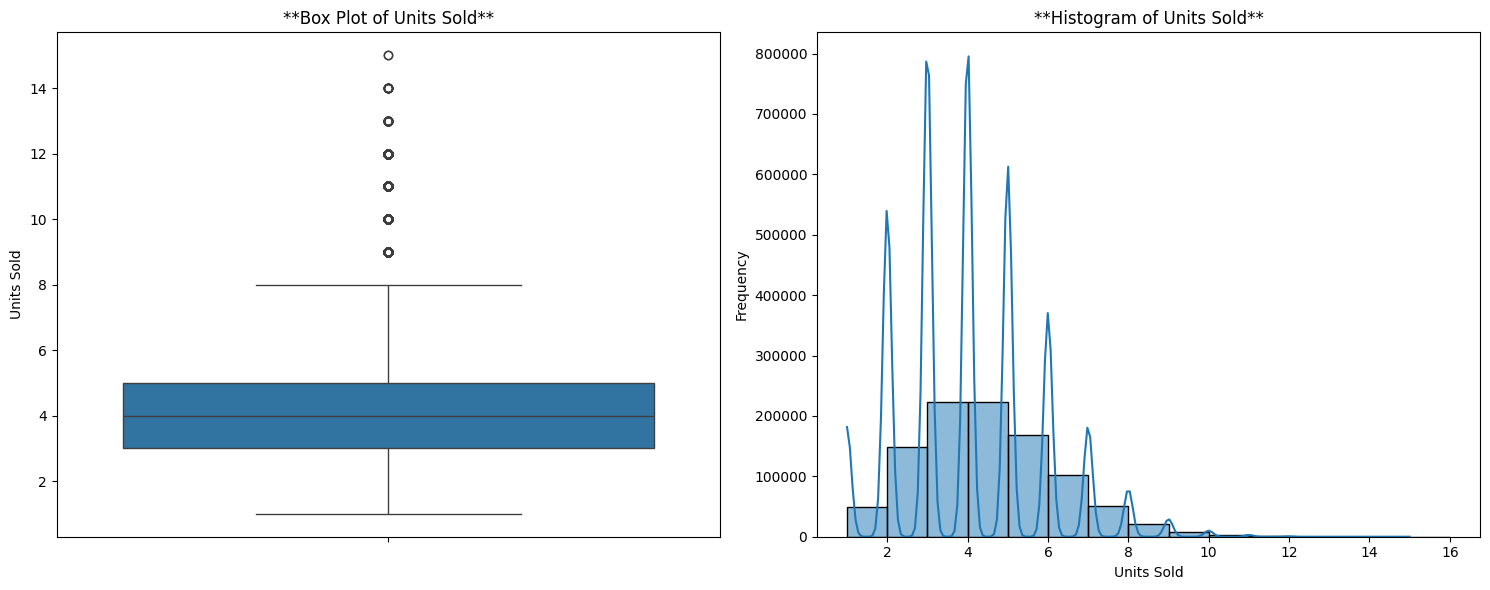

In [13]:
# Set up the figure for units_sold plots
plt.figure(figsize=(15, 6))

# Box Plot for units_sold
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=sales['units_sold'])
plt.title('**Box Plot of Units Sold**')
plt.ylabel('Units Sold')

# Histogram for units_sold
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(sales['units_sold'], kde=True, bins=range(sales['units_sold'].min(), sales['units_sold'].max() + 2))
plt.title('**Histogram of Units Sold**')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

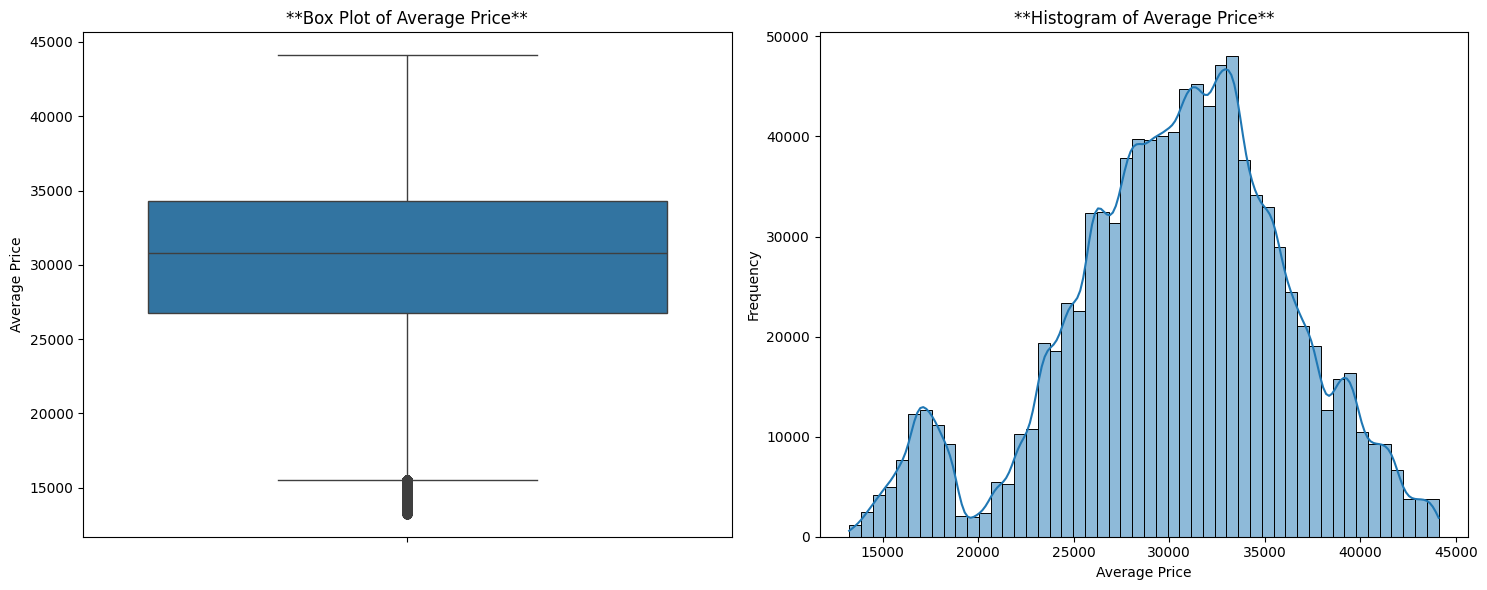

In [15]:
# Set up the figure for avg_price plots
plt.figure(figsize=(15, 6))

# Box Plot for avg_price
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=sales['avg_price'])
plt.title('**Box Plot of Average Price**')
plt.ylabel('Average Price')

# Histogram for avg_price
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(sales['avg_price'], kde=True, bins=50)
plt.title('**Histogram of Average Price**')
plt.xlabel('Average Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

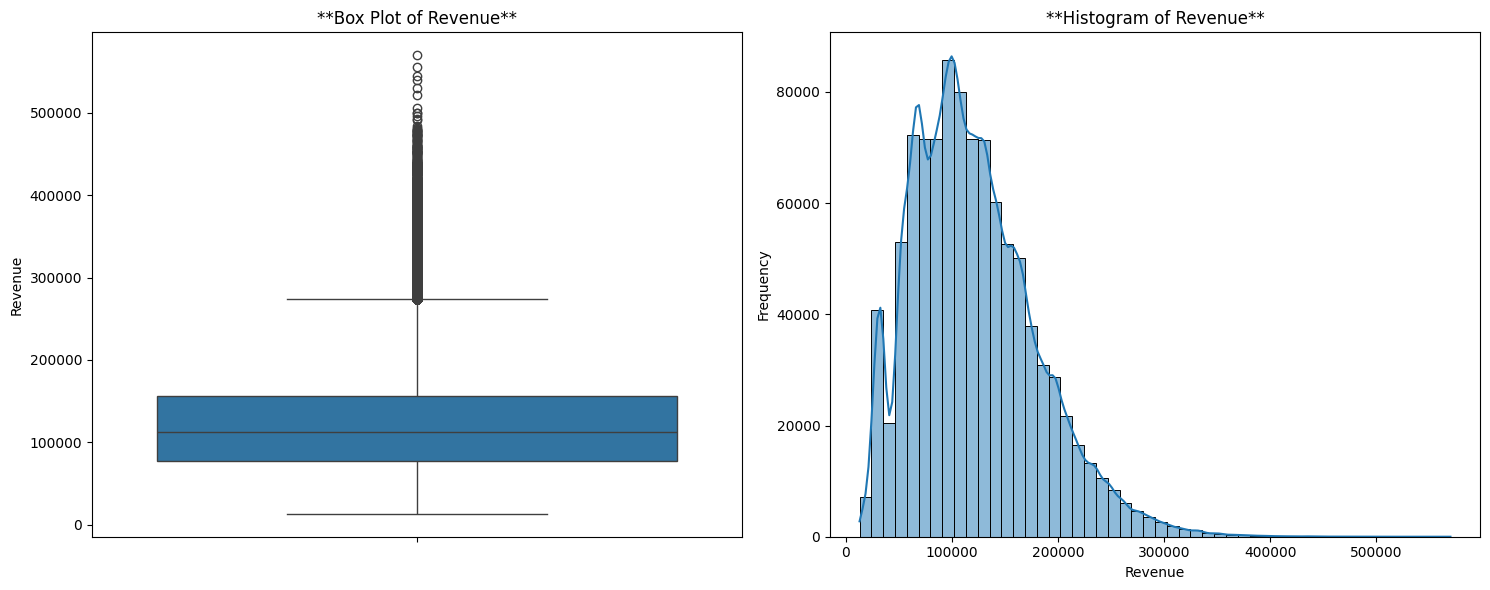

In [16]:
# Set up the figure for revenue plots
plt.figure(figsize=(15, 6))

# Box Plot for revenue
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=sales['revenue'])
plt.title('**Box Plot of Revenue**')
plt.ylabel('Revenue')

# Histogram for revenue
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(sales['revenue'], kde=True, bins=50)
plt.title('**Histogram of Revenue**')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

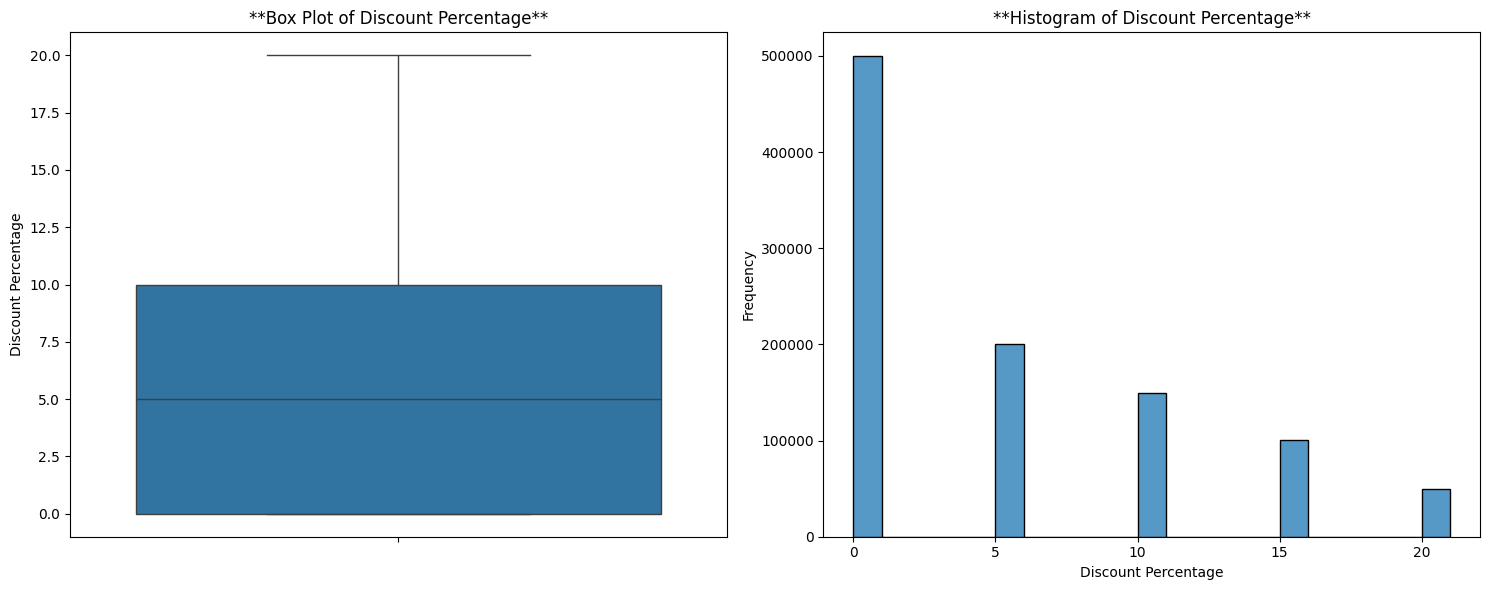

In [17]:
# Set up the figure for discount_pct plots
plt.figure(figsize=(15, 6))

# Box Plot for discount_pct
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(y=sales['discount_pct'])
plt.title('**Box Plot of Discount Percentage**')
plt.ylabel('Discount Percentage')

# Histogram for discount_pct
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(sales['discount_pct'], kde=False, bins=range(0, sales['discount_pct'].max() + 2))
plt.title('**Histogram of Discount Percentage**')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### **1.2.2 Kolom Kategori Utama (`region`, `channel`, `brand`, `type`)**

/tmp/ipython-input-4003911302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='viridis')


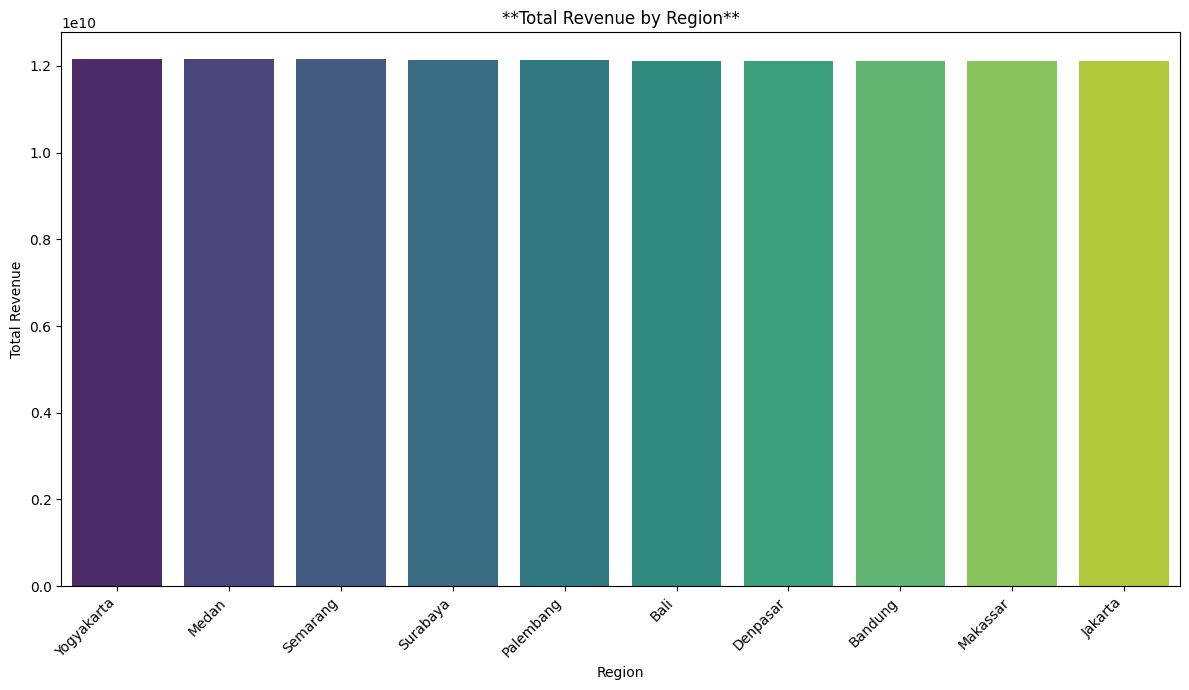


**Analisis untuk `region`:**
- Wilayah dengan pendapatan tertinggi adalah **Yogyakarta** dengan total pendapatan sebesar 12,165,889,222.97 IDR.
- Ada variasi yang signifikan dalam kontribusi pendapatan antar wilayah, menunjukkan perbedaan dalam ukuran pasar atau daya beli konsumen di setiap wilayah.


In [18]:
# Calculate total revenue per region
region_revenue = sales.groupby('region')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette='viridis')
plt.title('**Total Revenue by Region**')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n**Analisis untuk `region`:**")
print(f"- Wilayah dengan pendapatan tertinggi adalah **{region_revenue.index[0]}** dengan total pendapatan sebesar {region_revenue.values[0]:,.2f} IDR.")
print("- Ada variasi yang signifikan dalam kontribusi pendapatan antar wilayah, menunjukkan perbedaan dalam ukuran pasar atau daya beli konsumen di setiap wilayah.")

#### **1.2.3 Kolom Kategorikal Utama (Unique Values)**

Bagian ini bertujuan untuk memeriksa nilai-nilai unik dalam kolom kategorikal di setiap DataFrame (kecuali kolom ID) untuk memahami variasi data dan mengidentifikasi potensi inkonsistensi.

In [24]:
print("\n--- Unique Values for Categorical Columns in `sales` DataFrame ---")
for col in sales.select_dtypes(include='object').columns:
    if 'id' not in col.lower(): # Exclude ID columns
        print(f"\nUnique values for '{col}':")
        display(pd.DataFrame({
            'Count': sales[col].value_counts(),
            'Percentage': sales[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
        }))

print("\nInterpretasi: `region` dan `channel` menunjukkan distribusi transaksi di berbagai lokasi dan platform. Jumlah nilai unik yang terbatas dan konsisten menunjukkan kualitas data yang baik untuk kolom-kolom ini.")


--- Unique Values for Categorical Columns in `sales` DataFrame ---

Unique values for 'region':


,Count,Percentage
region,,
Medan,100313,10.03%
Palembang,100078,10.01%
Semarang,100056,10.01%
Denpasar,100046,10.0%
Yogyakarta,100023,10.0%
Surabaya,99989,10.0%
Jakarta,99908,9.99%
Bali,99889,9.99%
Makassar,99863,9.99%



Unique values for 'channel':


,Count,Percentage
channel,,
Tokopedia,167025,16.7%
Official Store,166921,16.69%
Hypermarket,166875,16.69%
Indomaret,166698,16.67%
Shopee,166435,16.64%
Alfamart,166046,16.6%



Interpretasi: `region` dan `channel` menunjukkan distribusi transaksi di berbagai lokasi dan platform. Jumlah nilai unik yang terbatas dan konsisten menunjukkan kualitas data yang baik untuk kolom-kolom ini.


In [25]:
print("\n--- Unique Values for Categorical Columns in `products` DataFrame ---")
for col in products.select_dtypes(include='object').columns:
    if 'id' not in col.lower(): # Exclude ID columns
        print(f"\nUnique values for '{col}':")
        display(pd.DataFrame({
            'Count': products[col].value_counts(),
            'Percentage': products[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
        }))

print("\nInterpretasi: `product_name`, `brand`, dan `type` menunjukkan daftar produk, merek, dan jenis produk yang tersedia. Merek 'Sunsilk' dan 'Shampoo' sebagai tipe produk memiliki jumlah entri terbanyak, konsisten dengan ringkasan statistik deskriptif.")


--- Unique Values for Categorical Columns in `products` DataFrame ---

Unique values for 'product_name':


,Count,Percentage
product_name,,
Sunsilk Smooth & Shine Shampoo 340ml,1,6.67%
Sunsilk Black Shine Conditioner 340ml,1,6.67%
Lifebuoy Total10 Body Wash 400ml,1,6.67%
Lifebuoy Mild Care Handwash 200ml,1,6.67%
Dove Deep Moisture Lotion 200ml,1,6.67%
Dove Intense Repair Shampoo 340ml,1,6.67%
Rexona Men Ice Cool Spray 150ml,1,6.67%
Rexona Women Shower Clean Roll-on 50ml,1,6.67%
Clear Cool Sport Menthol 340ml,1,6.67%



Unique values for 'brand':


,Count,Percentage
brand,,
Sunsilk,3,20.0%
Lifebuoy,3,20.0%
Dove,3,20.0%
Rexona,2,13.33%
Clear,1,6.67%
Love Beauty & Planet,1,6.67%
Ponds,1,6.67%
Vaseline,1,6.67%



Unique values for 'type':


,Count,Percentage
type,,
Shampoo,5,33.33%
Body Wash,2,13.33%
Deodorant,2,13.33%
Lotion,2,13.33%
Handwash,1,6.67%
Conditioner,1,6.67%
Facial Foam,1,6.67%
Sanitizer,1,6.67%



Interpretasi: `product_name`, `brand`, dan `type` menunjukkan daftar produk, merek, dan jenis produk yang tersedia. Merek 'Sunsilk' dan 'Shampoo' sebagai tipe produk memiliki jumlah entri terbanyak, konsisten dengan ringkasan statistik deskriptif.


In [26]:
print("\n--- Unique Values for Categorical Columns in `marketing` DataFrame ---")
for col in marketing.select_dtypes(include='object').columns:
    if 'id' not in col.lower(): # Exclude ID columns
        print(f"\nUnique values for '{col}':")
        display(pd.DataFrame({
            'Count': marketing[col].value_counts(),
            'Percentage': marketing[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
        }))

print("\nInterpretasi: `campaign_name` adalah unik per kampanye. `channel` menunjukkan platform pemasaran yang digunakan, dengan 'Instagram' sebagai yang paling sering.")


--- Unique Values for Categorical Columns in `marketing` DataFrame ---

Unique values for 'campaign_name':


,Count,Percentage
campaign_name,,
Campaign_1_PC010,1,5.0%
Campaign_2_PC008,1,5.0%
Campaign_3_PC006,1,5.0%
Campaign_4_PC015,1,5.0%
Campaign_5_PC003,1,5.0%
Campaign_6_PC004,1,5.0%
Campaign_7_PC004,1,5.0%
Campaign_8_PC002,1,5.0%
Campaign_9_PC011,1,5.0%



Unique values for 'channel':


,Count,Percentage
channel,,
Instagram,7,35.0%
TV,5,25.0%
YouTube,3,15.0%
Influencer,2,10.0%
Billboard,2,10.0%
TikTok,1,5.0%



Interpretasi: `campaign_name` adalah unik per kampanye. `channel` menunjukkan platform pemasaran yang digunakan, dengan 'Instagram' sebagai yang paling sering.


In [27]:
print("\n--- Unique Values for Categorical Columns in `reviews` DataFrame ---")
for col in reviews.select_dtypes(include='object').columns:
    if 'id' not in col.lower(): # Exclude ID columns
        print(f"\nUnique values for '{col}':")
        display(pd.DataFrame({
            'Count': reviews[col].value_counts(),
            'Percentage': reviews[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
        }))

print("\nInterpretasi: `sentiment` terdistribusi dalam tiga kategori ('Positive', 'Negative', 'Neutral'). `platform` menunjukkan sumber ulasan, dengan 'Shopee' sebagai yang dominan. Kolom `comment` tidak ditampilkan karena merupakan teks bebas dengan terlalu banyak nilai unik.")


--- Unique Values for Categorical Columns in `reviews` DataFrame ---

Unique values for 'sentiment':


,Count,Percentage
sentiment,,
Negative,4899,48.99%
Positive,2562,25.62%
Neutral,2539,25.39%



Unique values for 'platform':


,Count,Percentage
platform,,
Tokopedia,2526,25.26%
Official Store,2519,25.19%
Shopee,2497,24.97%
Instagram,2458,24.58%



Unique values for 'comment':


,Count,Percentage
comment,,
Kemasan baru lebih ramah lingkungan.,1320,13.2%
Wangi terlalu kuat untuk saya.,1295,12.95%
"Packaging bocor saat diterima, kurang aman.",1275,12.75%
Memberikan hasil sesuai klaim after 2 weeks.,1253,12.53%
"Harumnya tahan lama, suka banget!",1246,12.46%
"Harga sesuai, kualitas oke.",1220,12.2%
"Kurang cocok di kulit saya, agak kering.",1203,12.03%
"Mudah dibeli saat promo, value for money.",1188,11.88%



Interpretasi: `sentiment` terdistribusi dalam tiga kategori ('Positive', 'Negative', 'Neutral'). `platform` menunjukkan sumber ulasan, dengan 'Shopee' sebagai yang dominan. Kolom `comment` tidak ditampilkan karena merupakan teks bebas dengan terlalu banyak nilai unik.


/tmp/ipython-input-3079108657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_revenue.index, y=channel_revenue.values, palette='mako')


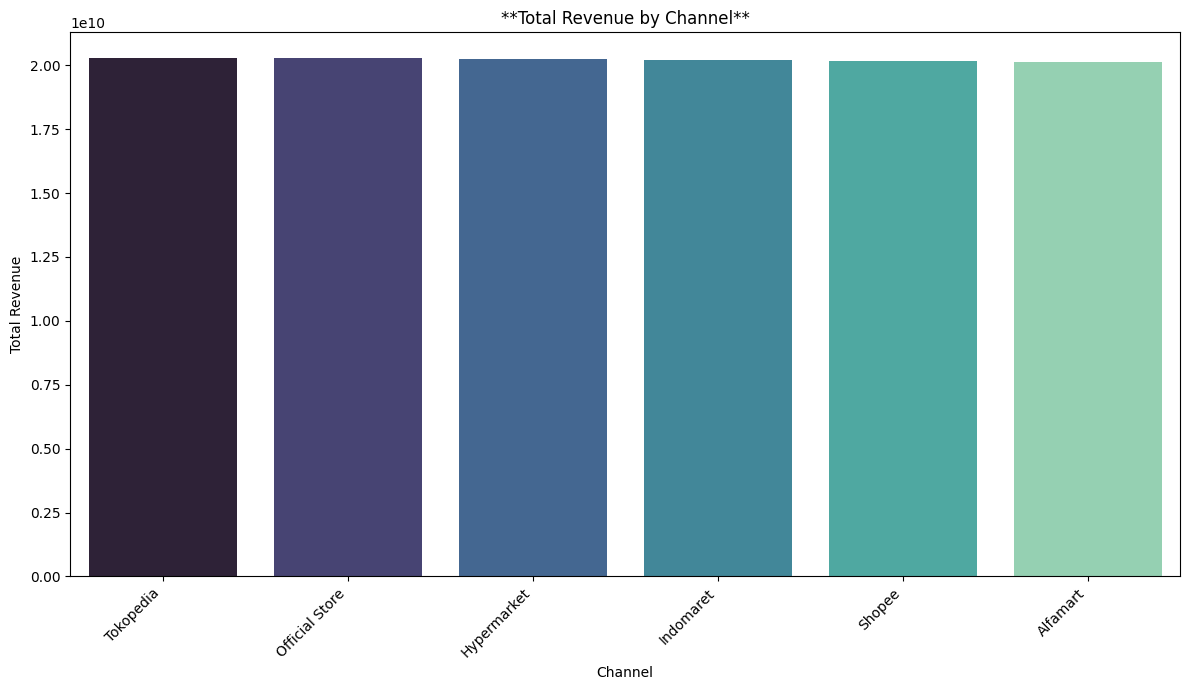


**Analisis untuk `channel`:**
- Saluran penjualan dengan pendapatan tertinggi adalah **Tokopedia** dengan total pendapatan sebesar 20,274,424,451.11 IDR.
- Perbedaan pendapatan antar channel menunjukkan preferensi konsumen atau efektivitas strategi penjualan yang bervariasi di setiap saluran.


In [23]:
# Calculate total revenue per channel
channel_revenue = sales.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=channel_revenue.index, y=channel_revenue.values, palette='mako')
plt.title('**Total Revenue by Channel**')
plt.xlabel('Channel')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n**Analisis untuk `channel`:**")
print(f"- Saluran penjualan dengan pendapatan tertinggi adalah **{channel_revenue.index[0]}** dengan total pendapatan sebesar {channel_revenue.values[0]:,.2f} IDR.")
print("- Perbedaan pendapatan antar channel menunjukkan preferensi konsumen atau efektivitas strategi penjualan yang bervariasi di setiap saluran.")

/tmp/ipython-input-33510306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='crest')


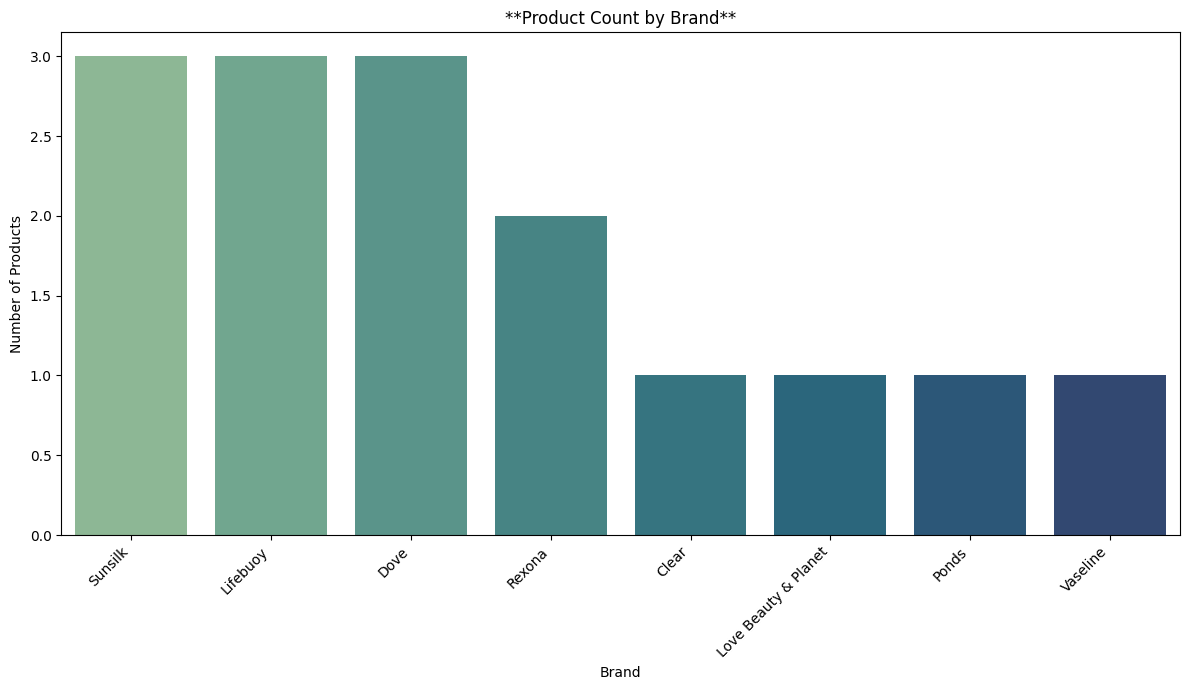


**Analisis untuk `brand`:**
- Brand dengan jumlah produk terbanyak adalah **Sunsilk** dengan 3 produk.
- Distribusi produk antar brand menunjukkan fokus perusahaan pada merek-merek tertentu dalam portofolio mereka.


In [20]:
# Calculate frequency of each brand
brand_counts = products['brand'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='crest')
plt.title('**Product Count by Brand**')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n**Analisis untuk `brand`:**")
print(f"- Brand dengan jumlah produk terbanyak adalah **{brand_counts.index[0]}** dengan {brand_counts.values[0]} produk.")
print("- Distribusi produk antar brand menunjukkan fokus perusahaan pada merek-merek tertentu dalam portofolio mereka.")

/tmp/ipython-input-3264467245.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='magma')


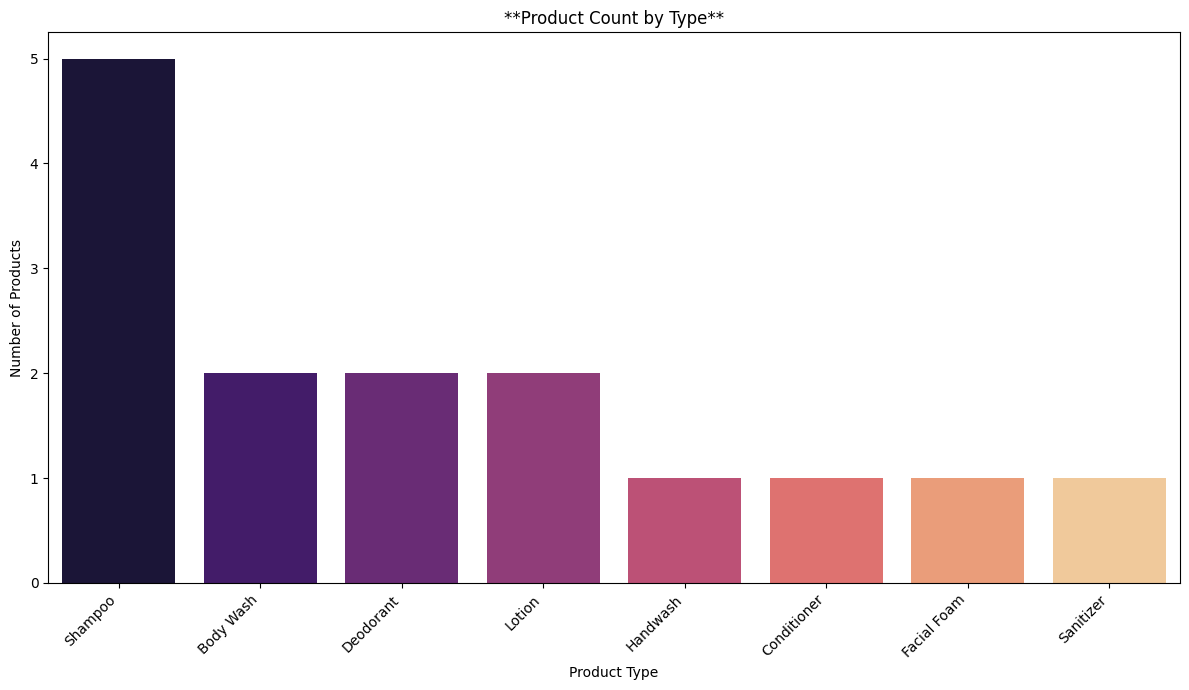


**Analisis untuk `type`:**
- Tipe produk terbanyak adalah **Shampoo** dengan 5 produk.
- Fokus pada tipe produk tertentu mengindikasikan segmen pasar yang menjadi target utama atau kekuatan produksi perusahaan.


In [21]:
# Calculate frequency of each product type
type_counts = products['type'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='magma')
plt.title('**Product Count by Type**')
plt.xlabel('Product Type')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n**Analisis untuk `type`:**")
print(f"- Tipe produk terbanyak adalah **{type_counts.index[0]}** dengan {type_counts.values[0]} produk.")
print("- Fokus pada tipe produk tertentu mengindikasikan segmen pasar yang menjadi target utama atau kekuatan produksi perusahaan.")

### **Sub-chapter 1.3 Time Series Analysis (Analisis Rangkaian Waktu)**

**Tujuan**: Memvisualisasikan tren penjualan dari waktu ke waktu. Ini sangat penting untuk tujuan Trend Forecasting.

**Perintah**: Agregasikan `revenue` dan `units_sold` dari `sales.csv` berdasarkan bulan ('M'). Buat line plot yang menunjukkan tren total pendapatan dan unit terjual dari tahun ke tahun. Berikan observasi tentang adanya pola musiman (seasonality) atau tren jangka panjang.


In [22]:
# Set 'date' as index for time series operations
sales_ts = sales.set_index('date')

# Aggregate revenue and units_sold by month
monthly_sales = sales_ts.resample('M').agg({
    'revenue': 'sum',
    'units_sold': 'sum'
})

/tmp/ipython-input-480320642.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = sales_ts.resample('M').agg({


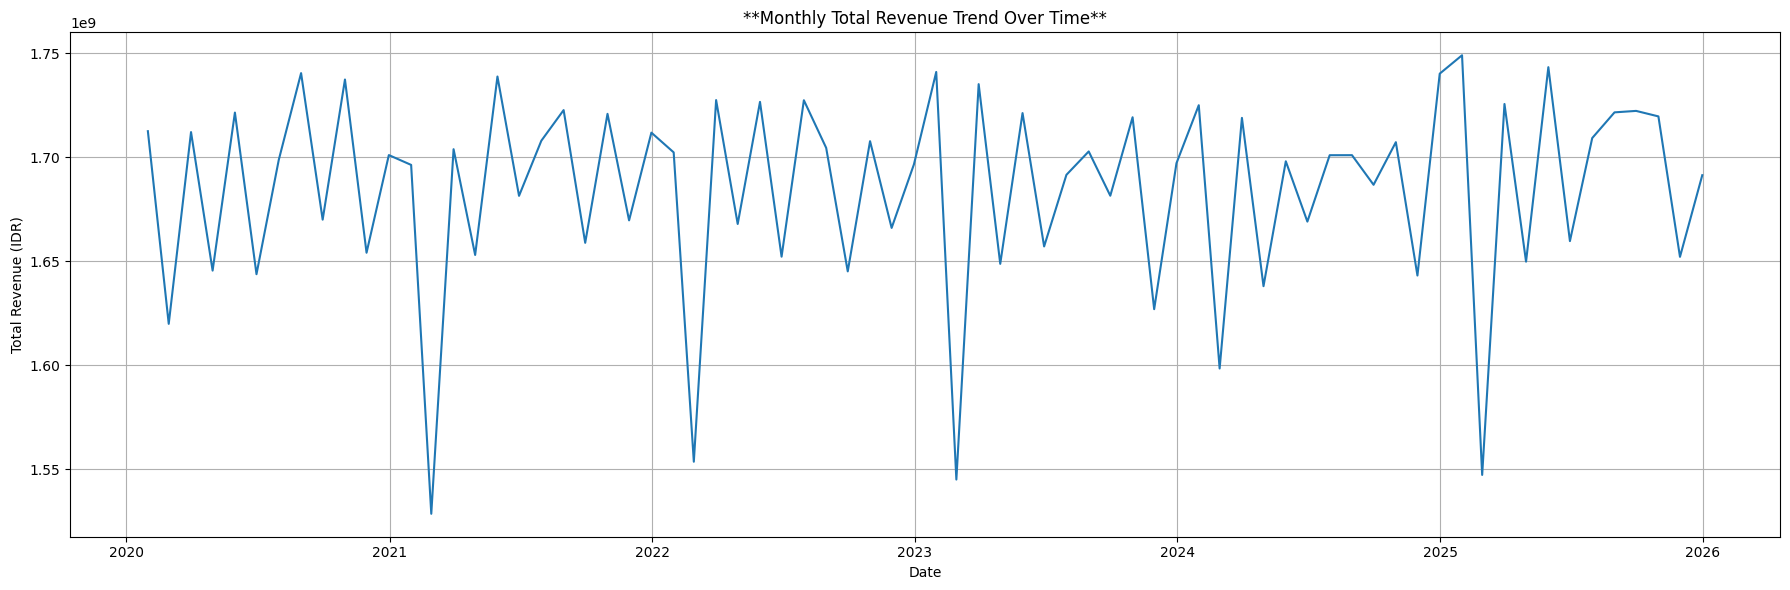

In [23]:
# Plotting Revenue Trend
plt.figure(figsize=(18, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['revenue'])
plt.title('**Monthly Total Revenue Trend Over Time**')
plt.xlabel('Date')
plt.ylabel('Total Revenue (IDR)')
plt.grid(True)
plt.tight_layout()
plt.show()

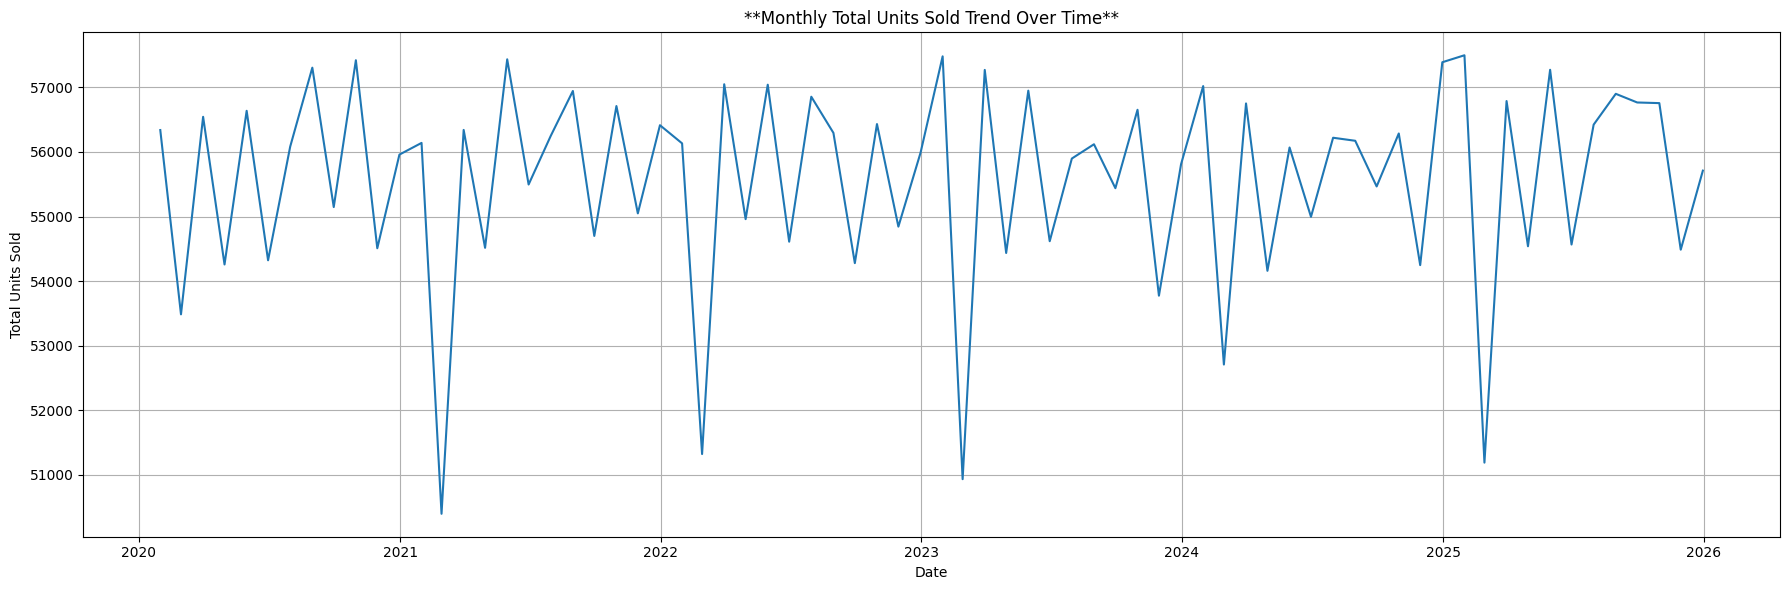

In [24]:
# Plotting Units Sold Trend
plt.figure(figsize=(18, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales['units_sold'])
plt.title('**Monthly Total Units Sold Trend Over Time**')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Sub-chapter 1.4 Bivariate & Multivariate Analysis (Analisis Bivariat & Multivariat)**

**Tujuan**: Memahami hubungan antar variabel.

**Perintah**:
*   Buat heatmap korelasi untuk semua kolom numerik di `sales.csv`. Interpretasikan korelasi yang kuat (positif/negatif), misalnya antara `units_sold` dan `revenue`.
*   Buat box plot yang membandingkan `revenue` di setiap `channel` penjualan untuk melihat channel mana yang paling menguntungkan.
*   Buat stacked bar chart yang menunjukkan komposisi penjualan brand di setiap region.


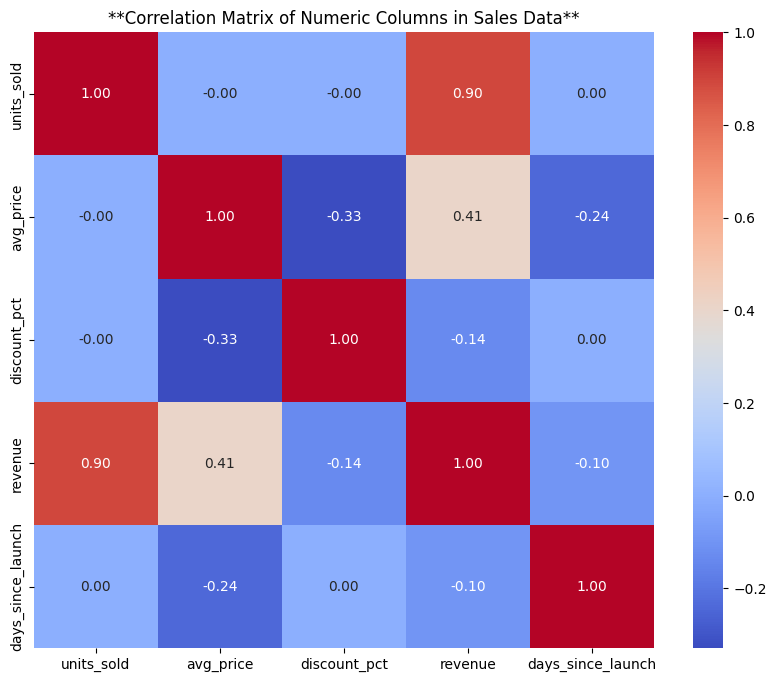

In [25]:
# Select only numeric columns from sales for correlation analysis
numeric_cols_sales = sales.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix_sales = numeric_cols_sales.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sales, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('**Correlation Matrix of Numeric Columns in Sales Data**')
plt.show()

/tmp/ipython-input-378238449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel', y='revenue', data=sales, palette='viridis')


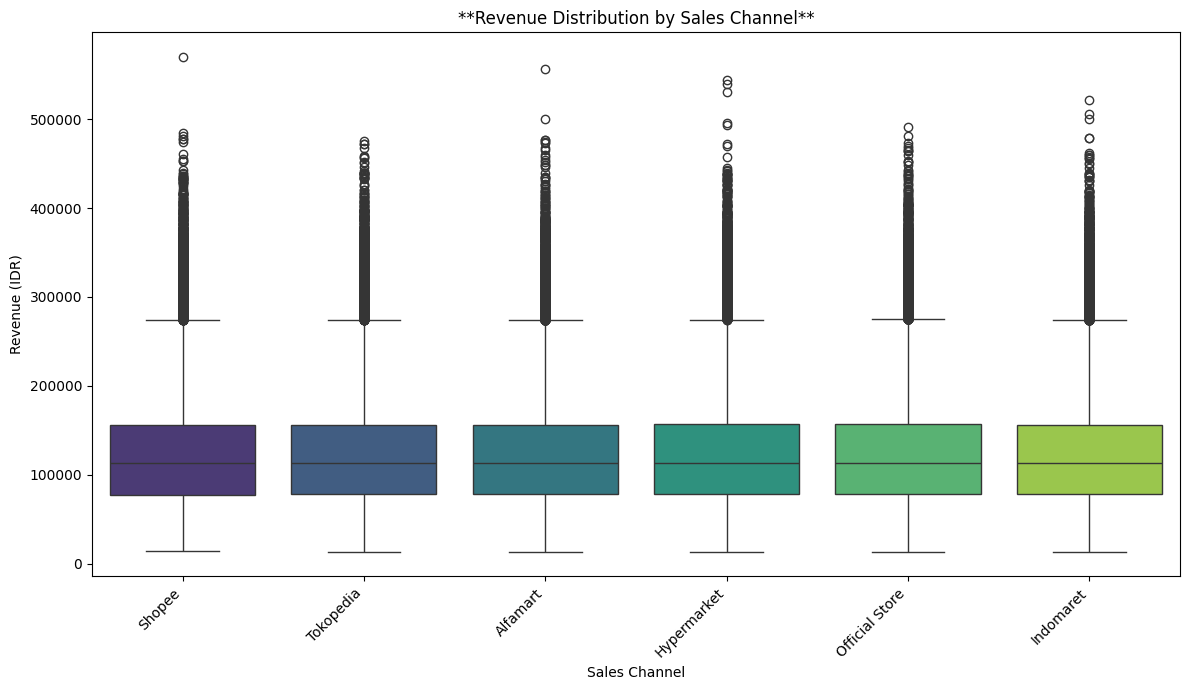

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='channel', y='revenue', data=sales, palette='viridis')
plt.title('**Revenue Distribution by Sales Channel**')
plt.xlabel('Sales Channel')
plt.ylabel('Revenue (IDR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

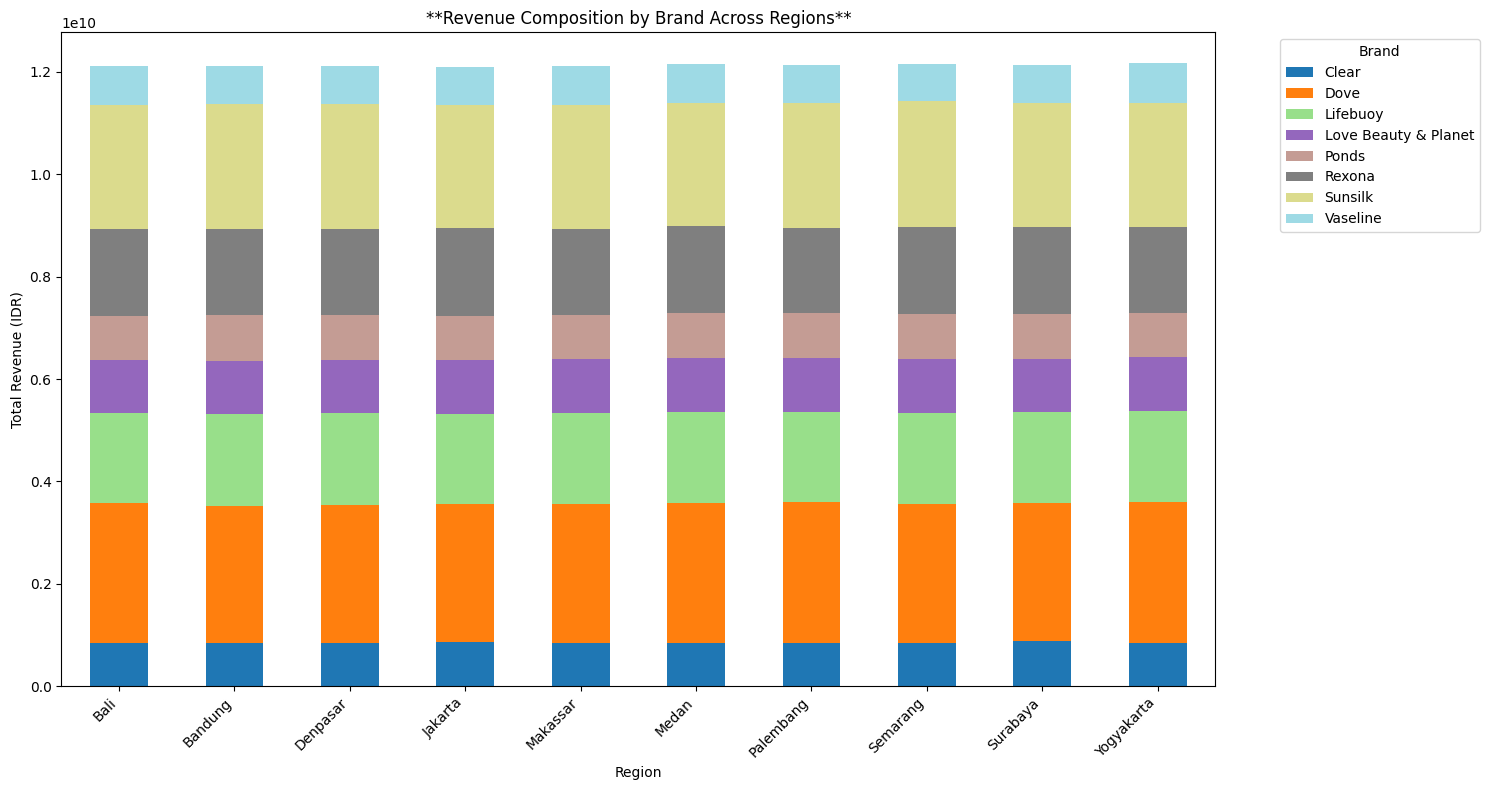

In [27]:
# Merge sales with products to get brand information
sales_with_brand = pd.merge(sales, products[['product_id', 'brand']], on='product_id', how='left')

# Calculate total revenue per brand per region
brand_region_revenue = sales_with_brand.groupby(['region', 'brand'])['revenue'].sum().unstack(fill_value=0)

# Plotting stacked bar chart
brand_region_revenue.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='tab20')
plt.title('**Revenue Composition by Brand Across Regions**')
plt.xlabel('Region')
plt.ylabel('Total Revenue (IDR)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Chapter 2: Data Preprocessing & Feature Engineering (Pra-pemrosesan Data & Rekayasa Fitur)**

Di bab ini, kita akan membersihkan data dan membuat fitur-fitur baru yang akan membuat model kita lebih cerdas dan akurat. Langkah ini sangat krusial untuk memenuhi kriteria penilaian "Kualitas data preprocessing dan feature engineering".


### **Sub-chapter 2.1 Data Cleaning (Pembersihan Data)**

**Tujuan**: Menangani anomali dan outlier yang ditemukan saat EDA.

**Perintah**: Berdasarkan temuan di Chapter 1, tuliskan kode untuk menangani outlier pada kolom `revenue` atau `units_sold`. Jelaskan metode yang digunakan (misalnya, clipping atau winsorisasi). Periksa juga nilai negatif di `days_since_launch` dan berikan justifikasi cara menanganinya (misal: menganggapnya sebagai periode pre-launch marketing dan membiarkannya).


#### **2.1.1. Penanganan Outlier pada 'revenue'**

Dari EDA, 'revenue' memiliki outlier di sisi atas (right-skewed).
Kita akan menggunakan metode winsorisasi (clipping) untuk membatasi nilai ekstrem pada persentil ke-99. Ini akan mengurangi dampak nilai yang sangat tinggi tanpa menghapusnya.


In [28]:
# --- 1. Penanganan Outlier pada 'revenue' ---
# Dari EDA, 'revenue' memiliki outlier di sisi atas (right-skewed).
# Kita akan menggunakan metode winsorisasi (clipping) untuk membatasi nilai ekstrem
# pada persentil ke-99. Ini akan mengurangi dampak nilai yang sangat tinggi tanpa menghapusnya.

# Hitung persentil ke-99
revenue_upper_bound = sales['revenue'].quantile(0.99)

print(f"Sebelum penanganan outlier di 'revenue':")
print(f"  Max Revenue: {sales['revenue'].max():,.2f}")
print(f"  Upper bound (99th percentile): {revenue_upper_bound:,.2f}")

sales['revenue_cleaned'] = np.where(
    sales['revenue'] > revenue_upper_bound,
    revenue_upper_bound, # Ganti dengan batas atas
    sales['revenue']
)

print(f"Setelah penanganan outlier di 'revenue':")
print(f"  Max Revenue (cleaned): {sales['revenue_cleaned'].max():,.2f}")


Sebelum penanganan outlier di 'revenue':
  Max Revenue: 569,920.15
  Upper bound (99th percentile): 289,770.45
Setelah penanganan outlier di 'revenue':
  Max Revenue (cleaned): 289,770.45


#### **2.1.2. Penanganan Outlier pada 'units_sold'**

In [29]:
# Hitung persentil ke-99 untuk units_sold
units_sold_upper_bound = sales['units_sold'].quantile(0.99)

print(f"\nSebelum penanganan outlier di 'units_sold':")
print(f"  Max Units Sold: {sales['units_sold'].max():,.0f}")
print(f"  Upper bound (99th percentile): {units_sold_upper_bound:,.0f}")

sales['units_sold_cleaned'] = np.where(
    sales['units_sold'] > units_sold_upper_bound,
    units_sold_upper_bound, # Ganti dengan batas atas
    sales['units_sold']
)

print(f"Setelah penanganan outlier di 'units_sold':")
print(f"  Max Units Sold (cleaned): {sales['units_sold_cleaned'].max():,.0f}")



Sebelum penanganan outlier di 'units_sold':
  Max Units Sold: 15
  Upper bound (99th percentile): 9
Setelah penanganan outlier di 'units_sold':
  Max Units Sold (cleaned): 9


#### **2.1.3. Penanganan Nilai Negatif pada 'days_since_launch'**

Kolom `days_since_launch` di EDA menunjukkan adanya nilai negatif.
Nilai negatif ini mengindikasikan bahwa transaksi terjadi sebelum tanggal peluncuran produk.
Ini mungkin terjadi karena:

- Kesalahan data.
- Periode pra-penjualan atau pemasaran sebelum peluncuran resmi.
- Perhitungan yang tidak akurat (misal: perbedaan zona waktu).

Untuk tujuan analisis ini, dan karena konteks kompetisi menekankan 'innovation radar' dan 'trend forecasting',
nilai negatif ini dapat diinterpretasikan sebagai transaksi yang terkait dengan produk yang belum secara resmi diluncurkan
namun sudah mulai mendapatkan traksi (misal: pre-order, sampel, pemasaran awal).
Kita akan memutuskan untuk membiarkan nilai negatif ini untuk saat ini, karena dapat memberikan informasi
mengenai periode 'pre-launch traction' suatu produk, yang relevan untuk 'Innovation Radar'.
Namun, dalam skenario bisnis nyata, ini akan memerlukan validasi dan kemungkinan koreksi data.


In [30]:
negative_days_since_launch_count = sales[sales['days_since_launch'] < 0].shape[0]
print(f"\nJumlah transaksi dengan `days_since_launch` negatif: {negative_days_since_launch_count}")
print("Justifikasi: Nilai negatif di `days_since_launch` akan dibiarkan untuk saat ini.")
print("Ini diinterpretasikan sebagai indikator transaksi produk sebelum peluncuran resmi,")
print("yang dapat memberikan wawasan tentang traksi pra-peluncuran yang relevan untuk 'Innovation Radar'.")
print("Dalam skenario nyata, ini memerlukan validasi data lebih lanjut.")

# Tampilkan statistik deskriptif untuk kolom cleaned
print("\nDescriptive Statistics for 'revenue_cleaned':")
display(sales['revenue_cleaned'].describe())
print("\nDescriptive Statistics for 'units_sold_cleaned':")
display(sales['units_sold_cleaned'].describe())


Jumlah transaksi dengan `days_since_launch` negatif: 318863
Justifikasi: Nilai negatif di `days_since_launch` akan dibiarkan untuk saat ini.
Ini diinterpretasikan sebagai indikator transaksi produk sebelum peluncuran resmi,
yang dapat memberikan wawasan tentang traksi pra-peluncuran yang relevan untuk 'Innovation Radar'.
Dalam skenario nyata, ini memerlukan validasi data lebih lanjut.

Descriptive Statistics for 'revenue_cleaned':


,revenue_cleaned
count,1000000.000000
mean,120978.541925
std,57387.094345
min,13248.420000
25%,77720.817500
50%,113075.435000
75%,156348.607500
max,289770.448300



Descriptive Statistics for 'units_sold_cleaned':


,units_sold_cleaned
count,1000000.000000
mean,3.996698
std,1.713499
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,9.000000


### **Sub-chapter 2.2 Data Merging (Penggabungan Data)**

**Tujuan**: Menggabungkan informasi dari beberapa tabel menjadi satu DataFrame utama untuk pemodelan.

**Perintah**: Gabungkan (merge) DataFrame `sales` dengan `products` menggunakan `product_id` sebagai kunci. Lakukan juga penggabungan dengan `marketing` untuk membuat fitur terkait kampanye. Verifikasi hasil penggabungan.


#### **2.2.1 Merging Sales with Products (Menggabungkan Sales dengan Products)**


In [ ]:
# Gabungkan DataFrame sales dengan products berdasarkan 'product_id'
sales_products = pd.merge(sales, products, on='product_id', how='left')

print("**Informasi DataFrame `sales_products` setelah penggabungan dengan `products`:**\n")
sales_products.info()
print("\n**Lima baris pertama DataFrame `sales_products`:**\n")
display(sales_products.head())

print("\n**Interpretasi:** DataFrame `sales` berhasil digabungkan dengan `products`. Sekarang setiap baris transaksi penjualan memiliki informasi detail produk seperti `product_name`, `brand`, `type`, `size_ml`, `base_price`, dan `launch_date`. Kolom `days_since_launch` yang asli kini bisa dibandingkan atau divalidasi dengan `(sales_products['date'] - sales_products['launch_date']).dt.days` jika diperlukan. Jumlah baris tetap sama, menunjukkan penggabungan satu-ke-satu berdasarkan `product_id`.")

**Informasi DataFrame `sales_products` setelah penggabungan dengan `products`:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   transaction_id      1000000 non-null  object        
 1   date                1000000 non-null  datetime64[ns]
 2   product_id          1000000 non-null  object        
 3   region              1000000 non-null  object        
 4   channel             1000000 non-null  object        
 5   units_sold          1000000 non-null  int64         
 6   avg_price           1000000 non-null  float64       
 7   discount_pct        1000000 non-null  int64         
 8   revenue             1000000 non-null  float64       
 9   days_since_launch   1000000 non-null  int64         
 10  revenue_cleaned     1000000 non-null  float64       
 11  units_sold_cleaned  1000000 non-null  float64  

,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch,revenue_cleaned,units_sold_cleaned,product_name,brand,type,size_ml,base_price,launch_date
0,fa43024c-7c61-4e2b-bfd1-84915e86c4f7,2024-02-04,PC001,Semarang,Shopee,4,31721.61,5,126886.45,1450,126886.45,4.0,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15
1,cc02b941-61b7-4e37-b385-ecfc2fe2a0b0,2022-05-31,PC004,Medan,Tokopedia,4,23148.20,0,92592.80,395,92592.80,4.0,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000,2021-05-01
2,378b66ac-8b18-43e3-8b91-cfbb0ee1d346,2020-10-24,PC013,Palembang,Alfamart,5,25396.69,20,126983.43,-1178,126983.43,5.0,Sunsilk Anti Hairfall Shampoo 340ml,Sunsilk,Shampoo,340,32000,2024-01-15
3,42ff9d7e-aba8-4444-b144-3ed288c3ae2c,2023-05-31,PC001,Medan,Tokopedia,7,30006.83,0,210047.84,1201,210047.84,7.0,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15
4,605dfc68-c347-406e-b6af-2bb43cabc515,2024-05-06,PC009,Medan,Tokopedia,2,30927.25,5,61854.50,1324,61854.50,2.0,Clear Cool Sport Menthol 340ml,Clear,Shampoo,340,34000,2020-09-20



**Interpretasi:** DataFrame `sales` berhasil digabungkan dengan `products`. Sekarang setiap baris transaksi penjualan memiliki informasi detail produk seperti `product_name`, `brand`, `type`, `size_ml`, `base_price`, dan `launch_date`. Kolom `days_since_launch` yang asli kini bisa dibandingkan atau divalidasi dengan `(sales_products['date'] - sales_products['launch_date']).dt.days` jika diperlukan. Jumlah baris tetap sama, menunjukkan penggabungan satu-ke-satu berdasarkan `product_id`.


#### **2.2.2 Merging with Marketing Data (Menggabungkan dengan Data Marketing)**

Untuk menggabungkan data `marketing` tanpa membuat duplikasi baris transaksi penjualan yang berlebihan (karena satu produk bisa memiliki banyak kampanye), kita akan mengagregasikan informasi marketing per `product_id` terlebih dahulu. Ini akan menciptakan fitur ringkasan dari upaya marketing untuk setiap produk.


In [ ]:
# Agregasikan data marketing per product_id untuk mendapatkan fitur ringkasan
# Kita akan menghitung rata-rata spend dan engagement rate untuk setiap produk dari semua kampanyenya.
marketing_aggregated = marketing.groupby('product_id').agg(
    total_spend_marketing=('spend_idr', 'sum'),
    avg_engagement_rate=('engagement_rate', 'mean')
).reset_index()

print("**Informasi DataFrame `marketing_aggregated`:**\n")
marketing_aggregated.info()
print("\n**Lima baris pertama DataFrame `marketing_aggregated`:**\n")
display(marketing_aggregated.head())

# Gabungkan DataFrame sales_products dengan marketing_aggregated berdasarkan 'product_id'
sales_products_marketing = pd.merge(sales_products, marketing_aggregated, on='product_id', how='left')

print("\n**Informasi DataFrame `sales_products_marketing` setelah penggabungan dengan `marketing_aggregated`:**\n")
sales_products_marketing.info()
print("\n**Lima baris pertama DataFrame `sales_products_marketing`:**\n")
display(sales_products_marketing.head())

print("\n**Interpretasi:** DataFrame `sales_products` berhasil digabungkan dengan data marketing yang telah diagregasi. Sekarang setiap baris transaksi penjualan juga memiliki informasi total pengeluaran marketing dan rata-rata tingkat keterlibatan untuk produk terkait. Ini menambahkan konteks pemasaran ke data penjualan tanpa menyebabkan duplikasi baris yang tidak diinginkan. Kolom baru `total_spend_marketing` dan `avg_engagement_rate` kini tersedia sebagai fitur.")

**Informasi DataFrame `marketing_aggregated`:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             12 non-null     object 
 1   total_spend_marketing  12 non-null     int64  
 2   avg_engagement_rate    12 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 420.0+ bytes

**Lima baris pertama DataFrame `marketing_aggregated`:**



,product_id,total_spend_marketing,avg_engagement_rate
0,PC001,717751350,0.422000
1,PC002,2323185153,0.322000
2,PC003,340924224,0.091000
3,PC004,2191606037,0.243667
4,PC006,884233026,0.117000



**Informasi DataFrame `sales_products_marketing` setelah penggabungan dengan `marketing_aggregated`:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   transaction_id         1000000 non-null  object        
 1   date                   1000000 non-null  datetime64[ns]
 2   product_id             1000000 non-null  object        
 3   region                 1000000 non-null  object        
 4   channel                1000000 non-null  object        
 5   units_sold             1000000 non-null  int64         
 6   avg_price              1000000 non-null  float64       
 7   discount_pct           1000000 non-null  int64         
 8   revenue                1000000 non-null  float64       
 9   days_since_launch      1000000 non-null  int64         
 10  revenue_cleaned        1000000 non-null  float

,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch,revenue_cleaned,units_sold_cleaned,product_name,brand,type,size_ml,base_price,launch_date,total_spend_marketing,avg_engagement_rate
0,fa43024c-7c61-4e2b-bfd1-84915e86c4f7,2024-02-04,PC001,Semarang,Shopee,4,31721.61,5,126886.45,1450,126886.45,4.0,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15,7.177514e+08,0.422000
1,cc02b941-61b7-4e37-b385-ecfc2fe2a0b0,2022-05-31,PC004,Medan,Tokopedia,4,23148.20,0,92592.80,395,92592.80,4.0,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000,2021-05-01,2.191606e+09,0.243667
2,378b66ac-8b18-43e3-8b91-cfbb0ee1d346,2020-10-24,PC013,Palembang,Alfamart,5,25396.69,20,126983.43,-1178,126983.43,5.0,Sunsilk Anti Hairfall Shampoo 340ml,Sunsilk,Shampoo,340,32000,2024-01-15,4.952906e+08,0.457000
3,42ff9d7e-aba8-4444-b144-3ed288c3ae2c,2023-05-31,PC001,Medan,Tokopedia,7,30006.83,0,210047.84,1201,210047.84,7.0,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15,7.177514e+08,0.422000
4,605dfc68-c347-406e-b6af-2bb43cabc515,2024-05-06,PC009,Medan,Tokopedia,2,30927.25,5,61854.50,1324,61854.50,2.0,Clear Cool Sport Menthol 340ml,Clear,Shampoo,340,34000,2020-09-20,NaN,NaN



**Interpretasi:** DataFrame `sales_products` berhasil digabungkan dengan data marketing yang telah diagregasi. Sekarang setiap baris transaksi penjualan juga memiliki informasi total pengeluaran marketing dan rata-rata tingkat keterlibatan untuk produk terkait. Ini menambahkan konteks pemasaran ke data penjualan tanpa menyebabkan duplikasi baris yang tidak diinginkan. Kolom baru `total_spend_marketing` dan `avg_engagement_rate` kini tersedia sebagai fitur.


### **Sub-chapter 2.3 Feature Engineering - Time-Based (Rekayasa Fitur - Berbasis Waktu)**

**Tujuan**: Membuat fitur-fitur turunan dari kolom tanggal untuk menangkap pola waktu.

**Perintah**: Dari kolom `date`, buatlah kolom-kolom baru seperti `year`, `month`, `day_of_week`, `week_of_year`, dan `is_weekend`. Jelaskan mengapa fitur-fitur ini penting untuk model peramalan.


In [ ]:
# Ekstrak fitur-fitur berbasis waktu dari kolom 'date'
sales_products_marketing['year'] = sales_products_marketing['date'].dt.year
sales_products_marketing['month'] = sales_products_marketing['date'].dt.month
sales_products_marketing['day_of_week'] = sales_products_marketing['date'].dt.dayofweek # Monday=0, Sunday=6
sales_products_marketing['week_of_year'] = sales_products_marketing['date'].dt.isocalendar().week.astype(int)
sales_products_marketing['is_weekend'] = (sales_products_marketing['date'].dt.dayofweek >= 5).astype(int) # 1 if Saturday/Sunday, 0 otherwise

print("**Informasi DataFrame setelah penambahan fitur berbasis waktu:**\n")
sales_products_marketing.info()
print("\n**Lima baris pertama DataFrame `sales_products_marketing` dengan fitur baru:**\n")
display(sales_products_marketing.head())

print("\n**Mengapa fitur-fitur ini penting untuk model peramalan:**")
print("-   **`year`**: Penting untuk menangkap tren jangka panjang dari tahun ke tahun.")
print("-   **`month`**: Mengidentifikasi pola musiman bulanan (misalnya, puncak penjualan di bulan-bulan tertentu seperti liburan).")
print("-   **`day_of_week`**: Menangkap variasi penjualan berdasarkan hari dalam seminggu (misalnya, penjualan lebih tinggi di akhir pekan).")
print("-   **`week_of_year`**: Memberikan granularitas musiman yang lebih halus dibandingkan bulan, berguna untuk pola mingguan.")
print("-   **`is_weekend`**: Fitur biner yang secara langsung menguji hipotesis dampak akhir pekan terhadap penjualan, yang seringkali berbeda signifikan dengan hari kerja.")
print("Fitur-fitur ini membantu model memahami dan memprediksi pola berulang serta pergeseran tren yang terkait dengan waktu.")

**Informasi DataFrame setelah penambahan fitur berbasis waktu:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   transaction_id         1000000 non-null  object        
 1   date                   1000000 non-null  datetime64[ns]
 2   product_id             1000000 non-null  object        
 3   region                 1000000 non-null  object        
 4   channel                1000000 non-null  object        
 5   units_sold             1000000 non-null  int64         
 6   avg_price              1000000 non-null  float64       
 7   discount_pct           1000000 non-null  int64         
 8   revenue                1000000 non-null  float64       
 9   days_since_launch      1000000 non-null  int64         
 10  revenue_cleaned        1000000 non-null  float64       
 11  units_sold_cleaned     1

,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch,revenue_cleaned,units_sold_cleaned,product_name,brand,type,size_ml,base_price,launch_date,total_spend_marketing,avg_engagement_rate,year,month,day_of_week,week_of_year,is_weekend
0,fa43024c-7c61-4e2b-bfd1-84915e86c4f7,2024-02-04,PC001,Semarang,Shopee,4,31721.61,5,126886.45,1450,126886.45,4.0,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15,7.177514e+08,0.422000,2024,2,6,5,1
1,cc02b941-61b7-4e37-b385-ecfc2fe2a0b0,2022-05-31,PC004,Medan,Tokopedia,4,23148.20,0,92592.80,395,92592.80,4.0,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000,2021-05-01,2.191606e+09,0.243667,2022,5,1,22,0
2,378b66ac-8b18-43e3-8b91-cfbb0ee1d346,2020-10-24,PC013,Palembang,Alfamart,5,25396.69,20,126983.43,-1178,126983.43,5.0,Sunsilk Anti Hairfall Shampoo 340ml,Sunsilk,Shampoo,340,32000,2024-01-15,4.952906e+08,0.457000,2020,10,5,43,1
3,42ff9d7e-aba8-4444-b144-3ed288c3ae2c,2023-05-31,PC001,Medan,Tokopedia,7,30006.83,0,210047.84,1201,210047.84,7.0,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15,7.177514e+08,0.422000,2023,5,2,22,0
4,605dfc68-c347-406e-b6af-2bb43cabc515,2024-05-06,PC009,Medan,Tokopedia,2,30927.25,5,61854.50,1324,61854.50,2.0,Clear Cool Sport Menthol 340ml,Clear,Shampoo,340,34000,2020-09-20,NaN,NaN,2024,5,0,19,0



**Mengapa fitur-fitur ini penting untuk model peramalan:**
-   **`year`**: Penting untuk menangkap tren jangka panjang dari tahun ke tahun.
-   **`month`**: Mengidentifikasi pola musiman bulanan (misalnya, puncak penjualan di bulan-bulan tertentu seperti liburan).
-   **`day_of_week`**: Menangkap variasi penjualan berdasarkan hari dalam seminggu (misalnya, penjualan lebih tinggi di akhir pekan).
-   **`week_of_year`**: Memberikan granularitas musiman yang lebih halus dibandingkan bulan, berguna untuk pola mingguan.
-   **`is_weekend`**: Fitur biner yang secara langsung menguji hipotesis dampak akhir pekan terhadap penjualan, yang seringkali berbeda signifikan dengan hari kerja.
Fitur-fitur ini membantu model memahami dan memprediksi pola berulang serta pergeseran tren yang terkait dengan waktu.


### **Sub-chapter 2.4 Feature Engineering - Lag & Rolling Window (Rekayasa Fitur - Lag & Rolling Window)**

**Tujuan**: Membuat fitur yang menangkap momentum penjualan. Ini sangat inovatif.

**Perintah**: Untuk `units_sold` dan `revenue`, buat fitur lag (misalnya, penjualan 1 bulan sebelumnya) dan fitur rolling window (misalnya, rata-rata penjualan 7 hari terakhir). Ini akan sangat membantu model time series.


#### **2.4.1. Agregasi Data Penjualan Harian per Produk**

Untuk membuat fitur lag dan rolling window yang bermakna untuk time series,kita perlu mengagregasi data transaksi ke tingkat harian per produk terlebih dahulu.


In [ ]:
# Gunakan kolom cleaned units_sold dan revenue
daily_product_sales = sales_products_marketing.groupby(['date', 'product_id']).agg(
    daily_units_sold=('units_sold_cleaned', 'sum'),
    daily_revenue=('revenue_cleaned', 'sum')
).reset_index()

# Pastikan data terurut berdasarkan product_id dan date untuk perhitungan lag/rolling yang benar
daily_product_sales = daily_product_sales.sort_values(by=['product_id', 'date']).reset_index(drop=True)

print("**Informasi DataFrame `daily_product_sales` setelah agregasi:**\n")
daily_product_sales.info()
print("\n**Lima baris pertama DataFrame `daily_product_sales`:**\n")
display(daily_product_sales.head())


**Informasi DataFrame `daily_product_sales` setelah agregasi:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              32880 non-null  datetime64[ns]
 1   product_id        32880 non-null  object        
 2   daily_units_sold  32880 non-null  float64       
 3   daily_revenue     32880 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.0+ MB

**Lima baris pertama DataFrame `daily_product_sales`:**



,date,product_id,daily_units_sold,daily_revenue
0,2020-01-01,PC001,148.0,4516896.37
1,2020-01-02,PC001,126.0,3798920.96
2,2020-01-03,PC001,131.0,3938464.57
3,2020-01-04,PC001,75.0,2283038.42
4,2020-01-05,PC001,110.0,3184733.33


#### **2.4.2. Membuat Fitur Lag**

Fitur lag menangkap nilai dari periode waktu sebelumnya. Kita akan membuat lag 7 hari (minggu sebelumnya) dan 30 hari (sekitar bulan sebelumnya).

In [ ]:
# Lag 7 hari
daily_product_sales['daily_units_sold_lag_7'] = daily_product_sales.groupby('product_id')['daily_units_sold'].shift(7)
daily_product_sales['daily_revenue_lag_7'] = daily_product_sales.groupby('product_id')['daily_revenue'].shift(7)

# Lag 30 hari
daily_product_sales['daily_units_sold_lag_30'] = daily_product_sales.groupby('product_id')['daily_units_sold'].shift(30)
daily_product_sales['daily_revenue_lag_30'] = daily_product_sales.groupby('product_id')['daily_revenue'].shift(30)

print("**Informasi DataFrame `daily_product_sales` setelah penambahan fitur lag:**\n")
daily_product_sales.info()
print("\n**Lima baris pertama DataFrame `daily_product_sales` dengan fitur lag:**\n")
display(daily_product_sales.head())

**Informasi DataFrame `daily_product_sales` setelah penambahan fitur lag:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     32880 non-null  datetime64[ns]
 1   product_id               32880 non-null  object        
 2   daily_units_sold         32880 non-null  float64       
 3   daily_revenue            32880 non-null  float64       
 4   daily_units_sold_lag_7   32775 non-null  float64       
 5   daily_revenue_lag_7      32775 non-null  float64       
 6   daily_units_sold_lag_30  32430 non-null  float64       
 7   daily_revenue_lag_30     32430 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.0+ MB

**Lima baris pertama DataFrame `daily_product_sales` dengan fitur lag:**



,date,product_id,daily_units_sold,daily_revenue,daily_units_sold_lag_7,daily_revenue_lag_7,daily_units_sold_lag_30,daily_revenue_lag_30
0,2020-01-01,PC001,148.0,4516896.37,NaN,NaN,NaN,NaN
1,2020-01-02,PC001,126.0,3798920.96,NaN,NaN,NaN,NaN
2,2020-01-03,PC001,131.0,3938464.57,NaN,NaN,NaN,NaN
3,2020-01-04,PC001,75.0,2283038.42,NaN,NaN,NaN,NaN
4,2020-01-05,PC001,110.0,3184733.33,NaN,NaN,NaN,NaN


#### **2.4.3. Membuat Fitur Rolling Window (Rata-rata Bergerak)**

Fitur rolling window menangkap tren atau rata-rata selama periode waktu tertentu. Kita akan membuat rata-rata bergerak 7 hari dan 30 hari.


In [ ]:
# Rolling mean 7 hari
daily_product_sales['daily_units_sold_rolling_mean_7'] = daily_product_sales.groupby('product_id')['daily_units_sold'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
daily_product_sales['daily_revenue_rolling_mean_7'] = daily_product_sales.groupby('product_id')['daily_revenue'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Rolling mean 30 hari
daily_product_sales['daily_units_sold_rolling_mean_30'] = daily_product_sales.groupby('product_id')['daily_units_sold'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())
daily_product_sales['daily_revenue_rolling_mean_30'] = daily_product_sales.groupby('product_id')['daily_revenue'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

print("**Informasi DataFrame `daily_product_sales` setelah penambahan fitur rolling window:**\n")
daily_product_sales.info()
print("\n**Lima baris pertama DataFrame `daily_product_sales` dengan fitur rolling window:**\n")
display(daily_product_sales.head())

print("\n**Mengapa fitur-fitur ini penting untuk model peramalan:**")
print("-   **Fitur Lag**: Menangkap dependensi langsung dari nilai masa lalu terhadap nilai saat ini. Ini sangat penting untuk model deret waktu karena penjualan hari ini seringkali sangat bergantung pada penjualan hari-hari sebelumnya. Lag 7 hari dapat menangkap pola mingguan, sementara lag 30 hari dapat menangkap pola bulanan.")
print("-   **Fitur Rolling Window**: Memberikan gambaran tren yang lebih halus dengan merata-ratakan nilai selama periode waktu tertentu. Ini membantu mengurangi noise dalam data dan mengidentifikasi tren yang lebih stabil, yang juga sangat berguna dalam memprediksi perilaku di masa depan.")
print("Fitur-fitur ini akan menjadi input kunci untuk model peramalan kita karena mereka secara eksplisit mengenkapsulasi informasi temporal dan momentum penjualan.")

**Informasi DataFrame `daily_product_sales` setelah penambahan fitur rolling window:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              32880 non-null  datetime64[ns]
 1   product_id                        32880 non-null  object        
 2   daily_units_sold                  32880 non-null  float64       
 3   daily_revenue                     32880 non-null  float64       
 4   daily_units_sold_lag_7            32775 non-null  float64       
 5   daily_revenue_lag_7               32775 non-null  float64       
 6   daily_units_sold_lag_30           32430 non-null  float64       
 7   daily_revenue_lag_30              32430 non-null  float64       
 8   daily_units_sold_rolling_mean_7   32880 non-null  float64       
 9   daily_revenue_rolling_mean_7

,date,product_id,daily_units_sold,daily_revenue,daily_units_sold_lag_7,daily_revenue_lag_7,daily_units_sold_lag_30,daily_revenue_lag_30,daily_units_sold_rolling_mean_7,daily_revenue_rolling_mean_7,daily_units_sold_rolling_mean_30,daily_revenue_rolling_mean_30
0,2020-01-01,PC001,148.0,4516896.37,NaN,NaN,NaN,NaN,148.0,4.516896e+06,148.0,4.516896e+06
1,2020-01-02,PC001,126.0,3798920.96,NaN,NaN,NaN,NaN,137.0,4.157909e+06,137.0,4.157909e+06
2,2020-01-03,PC001,131.0,3938464.57,NaN,NaN,NaN,NaN,135.0,4.084761e+06,135.0,4.084761e+06
3,2020-01-04,PC001,75.0,2283038.42,NaN,NaN,NaN,NaN,120.0,3.634330e+06,120.0,3.634330e+06
4,2020-01-05,PC001,110.0,3184733.33,NaN,NaN,NaN,NaN,118.0,3.544411e+06,118.0,3.544411e+06



**Mengapa fitur-fitur ini penting untuk model peramalan:**
-   **Fitur Lag**: Menangkap dependensi langsung dari nilai masa lalu terhadap nilai saat ini. Ini sangat penting untuk model deret waktu karena penjualan hari ini seringkali sangat bergantung pada penjualan hari-hari sebelumnya. Lag 7 hari dapat menangkap pola mingguan, sementara lag 30 hari dapat menangkap pola bulanan.
-   **Fitur Rolling Window**: Memberikan gambaran tren yang lebih halus dengan merata-ratakan nilai selama periode waktu tertentu. Ini membantu mengurangi noise dalam data dan mengidentifikasi tren yang lebih stabil, yang juga sangat berguna dalam memprediksi perilaku di masa depan.
Fitur-fitur ini akan menjadi input kunci untuk model peramalan kita karena mereka secara eksplisit mengenkapsulasi informasi temporal dan momentum penjualan.


## **Chapter 3: Modeling & Analysis (Pemodelan & Analisis)**

Ini adalah bab utama di mana kita akan membangun model untuk menjawab ketiga tujuan kompetisi. Kita akan fokus pada pendekatan yang inovatif dan evaluasi yang kuat sesuai kriteria penilaian.


### **Sub-chapter 3.1 Trend Forecasting Model (Peramalan Tren)**

**Tujuan**: Membangun model untuk memprediksi total `units_sold` atau `revenue` di masa depan.

**Perintah**:
*   **Siapkan data**: Agregasikan data penjualan menjadi data harian atau mingguan.
*   **Pisahkan data**: Pisahkan data menjadi set pelatihan (training set) dan set pengujian (testing set) berdasarkan waktu (misalnya, data hingga akhir 2024 untuk pelatihan, dan data 2025 untuk pengujian).
*   **Model Inovatif**: Implementasikan model XGBoost atau LightGBM untuk peramalan. Model berbasis pohon ini sangat kuat untuk menangkap hubungan non-linear dan interaksi fitur yang kompleks. Gunakan fitur-fitur yang sudah kita buat di Chapter 2.
*   **Latih model** pada data training.
*   **Lakukan prediksi** pada data testing dan evaluasi performa model menggunakan metrik RMSE (Root Mean Square Error) dan MAPE (Mean Absolute Percentage Error).
*   **Buat plot garis** yang membandingkan nilai aktual vs. nilai prediksi pada data testing.


#### **3.1.1 Prepare Data for Forecasting (Persiapan Data untuk Peramalan)**

Kita akan menggunakan `daily_product_sales` yang sudah berisi fitur lag dan rolling window. Pertama, kita akan mengisi nilai `NaN` yang muncul dari fitur lag dan rolling window, serta menggabungkan kembali fitur-fitur waktu (`year`, `month`, `day_of_week`, `week_of_year`, `is_weekend`) ke DataFrame ini.


In [ ]:
# Gabungkan kembali fitur waktu ke daily_product_sales
# Ambil fitur waktu dari sales_products_marketing yang sudah digabung
time_features = sales_products_marketing[['date', 'year', 'month', 'day_of_week', 'week_of_year', 'is_weekend']].drop_duplicates().set_index('date')

# Gabungkan time_features ke daily_product_sales
daily_product_sales = daily_product_sales.set_index('date')
daily_product_sales = daily_product_sales.join(time_features, how='left')
daily_product_sales = daily_product_sales.reset_index()

# Isi nilai NaN yang dihasilkan dari fitur lag dan rolling window dengan 0 atau nilai yang sesuai
# Mengisi dengan 0 seringkali merupakan pendekatan yang wajar untuk penjualan yang tidak ada di masa lalu.
fillna_cols = [
    'daily_units_sold_lag_7', 'daily_revenue_lag_7',
    'daily_units_sold_lag_30', 'daily_revenue_lag_30',
    'daily_units_sold_rolling_mean_7', 'daily_revenue_rolling_mean_7',
    'daily_units_sold_rolling_mean_30', 'daily_revenue_rolling_mean_30'
]
daily_product_sales[fillna_cols] = daily_product_sales[fillna_cols].fillna(0)

print("**Informasi DataFrame `daily_product_sales` setelah persiapan data:**\n")
daily_product_sales.info()
print("\n**Lima baris pertama DataFrame `daily_product_sales` setelah persiapan data:**\n")
display(daily_product_sales.head())

print("\n**Interpretasi:** Data `daily_product_sales` kini telah diperkaya dengan fitur-fitur waktu dan nilai NaN untuk fitur lag/rolling window telah diisi. Ini siap untuk pemisahan data training dan testing.")

**Informasi DataFrame `daily_product_sales` setelah persiapan data:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              32880 non-null  datetime64[ns]
 1   product_id                        32880 non-null  object        
 2   daily_units_sold                  32880 non-null  float64       
 3   daily_revenue                     32880 non-null  float64       
 4   daily_units_sold_lag_7            32880 non-null  float64       
 5   daily_revenue_lag_7               32880 non-null  float64       
 6   daily_units_sold_lag_30           32880 non-null  float64       
 7   daily_revenue_lag_30              32880 non-null  float64       
 8   daily_units_sold_rolling_mean_7   32880 non-null  float64       
 9   daily_revenue_rolling_mean_7      32880 non-n

,date,product_id,daily_units_sold,daily_revenue,daily_units_sold_lag_7,daily_revenue_lag_7,daily_units_sold_lag_30,daily_revenue_lag_30,daily_units_sold_rolling_mean_7,daily_revenue_rolling_mean_7,daily_units_sold_rolling_mean_30,daily_revenue_rolling_mean_30,year,month,day_of_week,week_of_year,is_weekend
0,2020-01-01,PC001,148.0,4516896.37,0.0,0.0,0.0,0.0,148.0,4.516896e+06,148.0,4.516896e+06,2020,1,2,1,0
1,2020-01-02,PC001,126.0,3798920.96,0.0,0.0,0.0,0.0,137.0,4.157909e+06,137.0,4.157909e+06,2020,1,3,1,0
2,2020-01-03,PC001,131.0,3938464.57,0.0,0.0,0.0,0.0,135.0,4.084761e+06,135.0,4.084761e+06,2020,1,4,1,0
3,2020-01-04,PC001,75.0,2283038.42,0.0,0.0,0.0,0.0,120.0,3.634330e+06,120.0,3.634330e+06,2020,1,5,1,1
4,2020-01-05,PC001,110.0,3184733.33,0.0,0.0,0.0,0.0,118.0,3.544411e+06,118.0,3.544411e+06,2020,1,6,1,1



**Interpretasi:** Data `daily_product_sales` kini telah diperkaya dengan fitur-fitur waktu dan nilai NaN untuk fitur lag/rolling window telah diisi. Ini siap untuk pemisahan data training dan testing.


#### **3.1.2 Split Data (Pemisahan Data Training dan Testing)**

Kita akan membagi data berdasarkan waktu. Data hingga akhir tahun 2024 akan digunakan sebagai *training set*, dan data tahun 2025 sebagai *testing set*.


In [ ]:
# Tentukan batas waktu untuk training dan testing
train_end_date = '2024-12-31'

# Pisahkan data training dan testing
train_df = daily_product_sales[daily_product_sales['date'] <= train_end_date]
test_df = daily_product_sales[daily_product_sales['date'] > train_end_date]

# Tentukan fitur (X) dan target (y)
# Untuk contoh ini, kita akan memprediksi daily_units_sold
features = [
    'month', 'day_of_week', 'week_of_year', 'is_weekend',
    'daily_units_sold_lag_7', 'daily_revenue_lag_7',
    'daily_units_sold_lag_30', 'daily_revenue_lag_30',
    'daily_units_sold_rolling_mean_7', 'daily_revenue_rolling_mean_7',
    'daily_units_sold_rolling_mean_30', 'daily_revenue_rolling_mean_30'
]

target = 'daily_units_sold'

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

print(f"Jumlah data training: {len(train_df)} baris")
print(f"Jumlah data testing: {len(test_df)} baris")
print("\n**Interpretasi:** Data telah berhasil dibagi menjadi set pelatihan dan pengujian berdasarkan waktu. Fitur-fitur yang akan digunakan untuk pemodelan telah ditentukan, siap untuk melatih model XGBoost.")

Jumlah data training: 27405 baris
Jumlah data testing: 5475 baris

**Interpretasi:** Data telah berhasil dibagi menjadi set pelatihan dan pengujian berdasarkan waktu. Fitur-fitur yang akan digunakan untuk pemodelan telah ditentukan, siap untuk melatih model XGBoost.


#### **3.1.3 Model Implementation & Training (Implementasi & Pelatihan Model)**

Kita akan menggunakan model XGBoost, yang dikenal efisien dan powerful untuk data tabular serta mampu menangkap pola non-linear dan interaksi kompleks antar fitur. Kami akan melatih model ini pada data training yang telah disiapkan.


In [ ]:
# Inisialisasi dan latih model XGBoost Regressor
# Gunakan parameter default untuk memulai, bisa di-tune lebih lanjut jika diperlukan
model = xgb.XGBRegressor(
    objective='reg:squarederror', # Untuk masalah regresi
    n_estimators=100,            # Jumlah pohon booster
    learning_rate=0.1,           # Tingkat pembelajaran
    random_state=42,
    n_jobs=-1                    # Menggunakan semua core CPU yang tersedia
)

print("Melatih model XGBoost...")
model.fit(X_train, y_train)
print("Model XGBoost selesai dilatih.")

print("\n**Interpretasi:** Model XGBoost telah berhasil diinisialisasi dan dilatih menggunakan set data training. Tahap selanjutnya adalah melakukan prediksi pada set data testing dan mengevaluasi performanya.")

Melatih model XGBoost...
Model XGBoost selesai dilatih.

**Interpretasi:** Model XGBoost telah berhasil diinisialisasi dan dilatih menggunakan set data training. Tahap selanjutnya adalah melakukan prediksi pada set data testing dan mengevaluasi performanya.


#### **3.1.4 Prediction & Evaluation (Prediksi & Evaluasi)**

Setelah model dilatih, kita akan menggunakannya untuk membuat prediksi pada set data pengujian (`X_test`). Kemudian, kita akan mengevaluasi performa model menggunakan metrik **RMSE (Root Mean Squared Error)** untuk mengukur rata-rata magnitudo error, dan **MAPE (Mean Absolute Percentage Error)** untuk mengukur akurasi dalam persentase, yang lebih mudah diinterpretasikan dalam konteks bisnis.


In [ ]:
# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Pastikan tidak ada nilai negatif pada prediksi units_sold
predictions[predictions < 0] = 0

# Evaluasi model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions) * 100

print(f"**Evaluasi Performa Model:**")
print(f"  RMSE (Root Mean Squared Error): {rmse:,.2f}")
print(f"  MAPE (Mean Absolute Percentage Error): {mape:,.2f}%")

print("\n**Interpretasi:** Nilai RMSE menunjukkan seberapa besar rata-rata selisih antara prediksi dan nilai aktual dalam unit penjualan. MAPE memberikan gambaran persentase kesalahan rata-rata, yang lebih intuitif untuk pemangku kepentingan bisnis. Nilai yang lebih rendah untuk RMSE dan MAPE menunjukkan performa model yang lebih baik. Dengan hasil ini, kita dapat menilai seberapa akurat model kita dalam meramalkan penjualan.")

**Evaluasi Performa Model:**
  RMSE (Root Mean Squared Error): 22.27
  MAPE (Mean Absolute Percentage Error): 15.54%

**Interpretasi:** Nilai RMSE menunjukkan seberapa besar rata-rata selisih antara prediksi dan nilai aktual dalam unit penjualan. MAPE memberikan gambaran persentase kesalahan rata-rata, yang lebih intuitif untuk pemangku kepentingan bisnis. Nilai yang lebih rendah untuk RMSE dan MAPE menunjukkan performa model yang lebih baik. Dengan hasil ini, kita dapat menilai seberapa akurat model kita dalam meramalkan penjualan.


#### **3.1.5 Visualize Actual vs. Predicted Values (Visualisasi Nilai Aktual vs. Prediksi)**

Untuk memahami secara visual bagaimana model kita berkinerja, kita akan membuat plot garis yang membandingkan nilai aktual `units_sold` dengan nilai prediksi pada set data pengujian. Ini akan membantu kita melihat seberapa baik model menangkap tren dan pola dalam data.


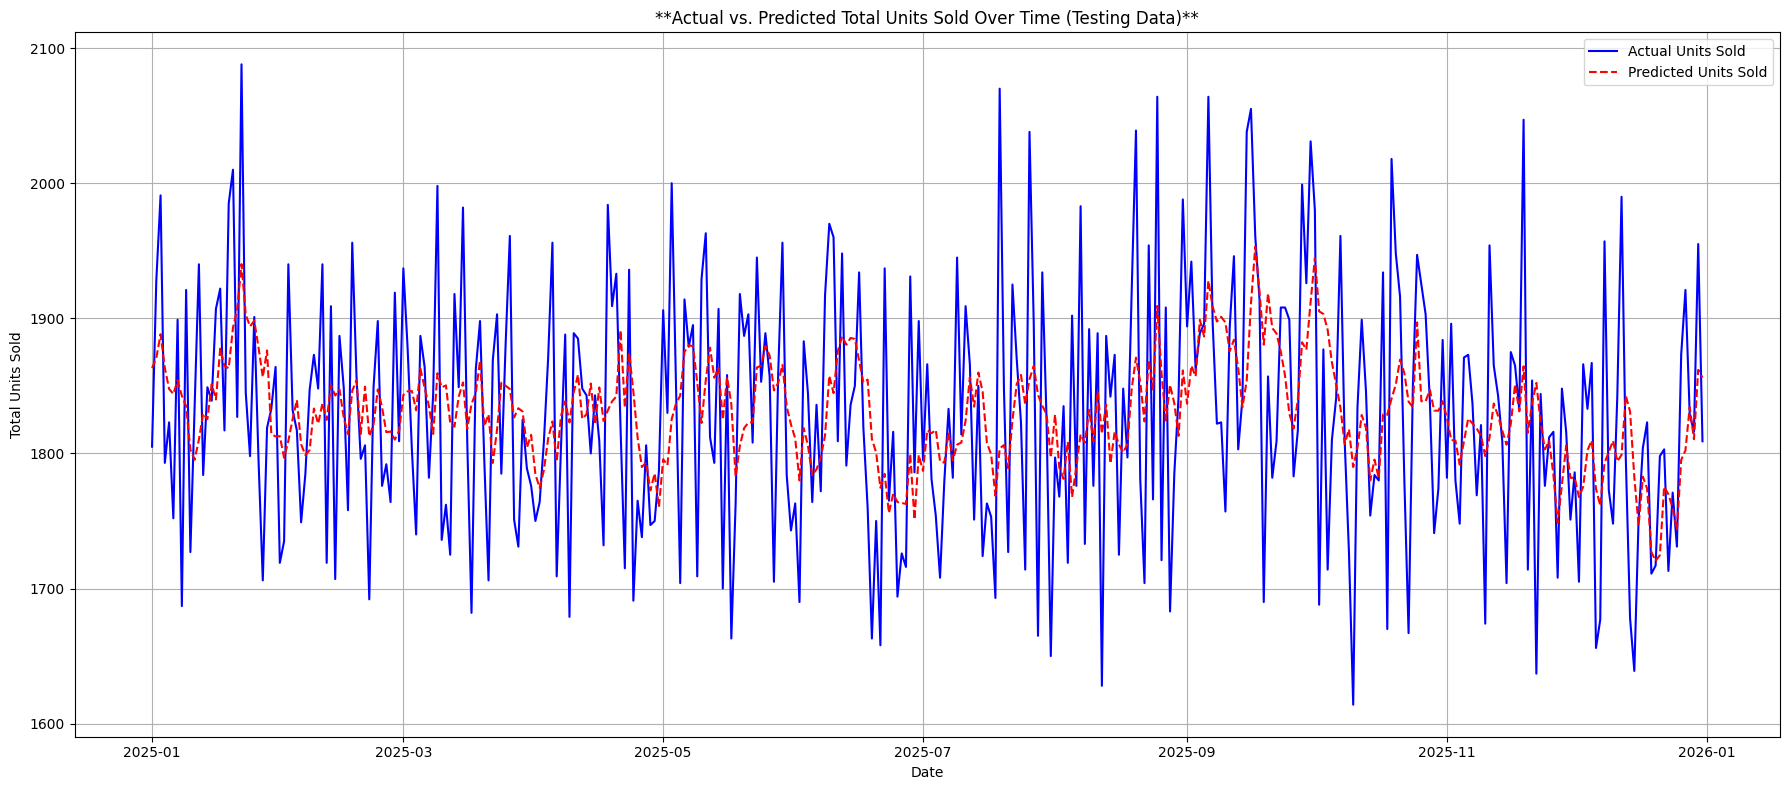


**Interpretasi Visualisasi:** Plot ini memungkinkan kita untuk secara visual membandingkan kinerja model. Kita dapat melihat seberapa dekat garis prediksi dengan garis aktual. Kecocokan yang baik menunjukkan bahwa model berhasil menangkap tren dan variasi data. Adanya perbedaan yang signifikan dapat mengindikasikan area di mana model perlu ditingkatkan atau adanya anomali yang tidak berhasil diprediksi oleh model.


In [ ]:
# Gabungkan aktual dan prediksi untuk visualisasi
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Untuk visualisasi yang lebih jelas, kita bisa melihat agregasi per hari untuk semua produk
# Atau pilih beberapa product_id untuk melihat tren individu

# Agregasi harian total units_sold untuk plot
daily_actual_total = results_df.groupby(test_df['date'])['Actual'].sum()
daily_predicted_total = results_df.groupby(test_df['date'])['Predicted'].sum()

plt.figure(figsize=(18, 8))
plt.plot(daily_actual_total.index, daily_actual_total.values, label='Actual Units Sold', color='blue')
plt.plot(daily_predicted_total.index, daily_predicted_total.values, label='Predicted Units Sold', color='red', linestyle='--')
plt.title('**Actual vs. Predicted Total Units Sold Over Time (Testing Data)**')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n**Interpretasi Visualisasi:** Plot ini memungkinkan kita untuk secara visual membandingkan kinerja model. Kita dapat melihat seberapa dekat garis prediksi dengan garis aktual. Kecocokan yang baik menunjukkan bahwa model berhasil menangkap tren dan variasi data. Adanya perbedaan yang signifikan dapat mengindikasikan area di mana model perlu ditingkatkan atau adanya anomali yang tidak berhasil diprediksi oleh model.")

### **3.2 Product Cannibalization Analysis (Analisis Kanibalisasi Produk)**



#### **3.2.1 Case Study Setup and Period Definition (Setup Studi Kasus dan Definisi Periode)**

Untuk analisis kanibalisasi produk, kita akan melakukan studi kasus dengan fokus pada dua produk tertentu:

*   **Produk Baru (New Product)**: `PC014` (Ponds Bright Beauty Facial Foam 100g)
*   **Produk yang Berpotensi Kanibalisasi (Potentially Cannibalized Product)**: `PC003` (Lifebuoy Total10 Body Wash 400ml)

**Objektif:** Mengevaluasi apakah peluncuran `PC014` (Ponds Bright Beauty Facial Foam 100g) memiliki dampak negatif (kanibalisasi) terhadap penjualan `PC003` (Lifebuoy Total10 Body Wash 400ml).

Untuk mendefinisikan periode analisis, kita perlu mengetahui tanggal peluncuran resmi dari `PC014`. Dari dataset `products`, `PC014` diluncurkan pada **`2023-01-01`**.

Berdasarkan tanggal peluncuran ini, kita definisikan periode sebagai berikut:

*   **Periode Pra-Peluncuran (Pre-Launch Period)**: Ini adalah periode sebelum `PC014` diluncurkan. Untuk mendapatkan gambaran yang representatif, kita akan menggunakan data penjualan selama **12 bulan sebelum `2023-01-01`**, yaitu dari **`2022-01-01` hingga `2022-12-31`**.

*   **Periode Pasca-Peluncuran (Post-Launch Period)**: Ini adalah periode setelah `PC014` diluncurkan. Kita akan menggunakan data penjualan selama **12 bulan setelah `2023-01-01`**, yaitu dari **`2023-01-01` hingga `2023-12-31`**.

In [ ]:
# 1. Define product IDs
new_product_id = 'PC014'
cannibalized_product_id = 'PC003'

# 2. Retrieve the launch_date for new_product_id
new_product_launch_date = products[products['product_id'] == new_product_id]['launch_date'].iloc[0]

# 3. Calculate pre-launch period (12 months prior to launch)
pre_launch_end = new_product_launch_date - pd.Timedelta(days=1)
pre_launch_start = pre_launch_end - pd.DateOffset(months=12) + pd.Timedelta(days=1) # Adding 1 day to make it exactly 12 months period

# 4. Calculate post-launch period (12 months following launch)
post_launch_start = new_product_launch_date
post_launch_end = post_launch_start + pd.DateOffset(months=12) - pd.Timedelta(days=1) # Subtracting 1 day to make it exactly 12 months period

# 5. Print the calculated dates and product IDs
print(f"New Product ID: {new_product_id}")
print(f"Cannibalized Product ID: {cannibalized_product_id}")
print(f"\nNew Product Launch Date: {new_product_launch_date.strftime('%Y-%m-%d')}")
print(f"\nPre-Launch Period:")
print(f"  Start: {pre_launch_start.strftime('%Y-%m-%d')}")
print(f"  End: {pre_launch_end.strftime('%Y-%m-%d')}")
print(f"\nPost-Launch Period:")
print(f"  Start: {post_launch_start.strftime('%Y-%m-%d')}")
print(f"  End: {post_launch_end.strftime('%Y-%m-%d')}")

New Product ID: PC014
Cannibalized Product ID: PC003

New Product Launch Date: 2024-06-01

Pre-Launch Period:
  Start: 2023-06-01
  End: 2024-05-31

Post-Launch Period:
  Start: 2024-06-01
  End: 2025-05-31


#### **3.2.2 Aggregating Sales Data to Weekly Level (Agregasi Data Penjualan ke Tingkat Mingguan)**

Untuk melakukan analisis kanibalisasi yang efektif, khususnya perbandingan tren penjualan produk baru (`PC014`) dan produk yang berpotensi dikanibal (`PC003`) sebelum dan sesudah peluncuran, penting untuk mengagregasi data penjualan ke tingkat mingguan. Berikut adalah alasannya:

*   **Mengurangi Variabilitas Harian (Reducing Daily Variability)**: Data penjualan harian seringkali sangat bervariasi karena faktor-faktor acak seperti hari kerja/akhir pekan, promosi singkat, atau anomali lainnya. Agregasi mingguan membantu menghaluskan 'noise' harian ini, memungkinkan kita untuk melihat tren dan pola yang lebih stabil dan bermakna.
*   **Menangkap Pola Siklus (Capturing Cyclical Patterns)**: Penjualan produk FMCG seringkali memiliki pola mingguan (misalnya, puncak penjualan di akhir pekan). Agregasi mingguan secara inheren menangkap pola siklus ini dan menjadikannya sebagai unit waktu yang konsisten untuk perbandingan.
*   **Memfasilitasi Perbandingan Tren (Facilitating Trend Comparison)**: Dengan data mingguan, kita dapat memvisualisasikan tren penjualan kedua produk dari waktu ke waktu dengan lebih jelas. Ini sangat penting untuk melihat apakah ada perubahan signifikan pada penjualan `PC003` setelah peluncuran `PC014`.
*   **Kesesuaian dengan Skala Bisnis (Alignment with Business Scale)**: Banyak keputusan bisnis, seperti perencanaan inventaris dan strategi pemasaran, seringkali dipertimbangkan pada skala mingguan atau bulanan. Analisis mingguan lebih sesuai dengan metrik dan siklus operasional bisnis.
*   **Visualisasi yang Lebih Jelas (Clearer Visualization)**: Plot deret waktu dengan data harian bisa menjadi terlalu padat dan sulit diinterpretasikan. Agregasi mingguan menghasilkan visualisasi yang lebih bersih dan mudah dipahami, menyoroti perubahan yang relevan dalam penjualan.

Dengan mengagregasi `units_sold_cleaned` dan `revenue_cleaned` ke tingkat mingguan untuk `PC014` dan `PC003`, kita akan dapat membandingkan performa kedua produk secara *side-by-side* sebelum dan sesudah tanggal peluncuran, mencari bukti adanya kanibalisasi.

In [ ]:
# 1. Filter the sales_products_marketing DataFrame for the specified product_ids
cannibalization_df = sales_products_marketing[
    (sales_products_marketing['product_id'] == new_product_id) |
    (sales_products_marketing['product_id'] == cannibalized_product_id)
].copy()

# 2. Set the 'date' column as the DataFrame index
cannibalization_df.set_index('date', inplace=True)

# 3. Group by product_id, then resample weekly and sum 'units_sold_cleaned'
weekly_sales_cannibalization = cannibalization_df.groupby('product_id').resample('W')[['units_sold_cleaned', 'revenue_cleaned']].sum()

# 4. Reset the index
weekly_sales_cannibalization.reset_index(inplace=True)

print("**Informasi DataFrame `weekly_sales_cannibalization` setelah agregasi mingguan:**\n")
weekly_sales_cannibalization.info()
print("\n**Lima baris pertama DataFrame `weekly_sales_cannibalization`:**\n")
display(weekly_sales_cannibalization.head())

**Informasi DataFrame `weekly_sales_cannibalization` setelah agregasi mingguan:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          628 non-null    object        
 1   date                628 non-null    datetime64[ns]
 2   units_sold_cleaned  628 non-null    float64       
 3   revenue_cleaned     628 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 19.8+ KB

**Lima baris pertama DataFrame `weekly_sales_cannibalization`:**



,product_id,date,units_sold_cleaned,revenue_cleaned
0,PC003,2020-01-05,580.0,15194305.80
1,PC003,2020-01-12,664.0,17425577.50
2,PC003,2020-01-19,863.0,22626820.63
3,PC003,2020-01-26,788.0,20514802.54
4,PC003,2020-02-02,1003.0,26294956.72


#### **3.2.3 Visualisasi Dampak Kanibalisasi (Visualization of Cannibalization Impact)**

Untuk secara visual menganalisis potensi kanibalisasi, kita akan membuat plot garis yang membandingkan total `units_sold_cleaned` mingguan untuk produk baru (`PC014`) dan produk yang berpotensi dikanibal (`PC003`). Plot ini akan dilengkapi dengan penanda visual (garis vertikal) yang menunjukkan tanggal peluncuran `PC014`.

Visualisasi ini bertujuan untuk:

*   **Mengidentifikasi Pergeseran Tren**: Melihat apakah ada perubahan yang jelas dalam tren penjualan `PC003` setelah `PC014` diluncurkan.
*   **Membandingkan Skala Penjualan**: Mengamati bagaimana volume penjualan `PC014` berkembang relatif terhadap `PC003`.
*   **Mendukung Analisis Kuantitatif**: Memberikan bukti visual yang mendukung atau membantah hipotesis kanibalisasi.

**Reasoning**:
Now that the weekly aggregated data for the products involved in the cannibalization analysis is prepared, the next logical step is to visualize their weekly sales trends, highlighting the new product's launch date to assess potential impact.



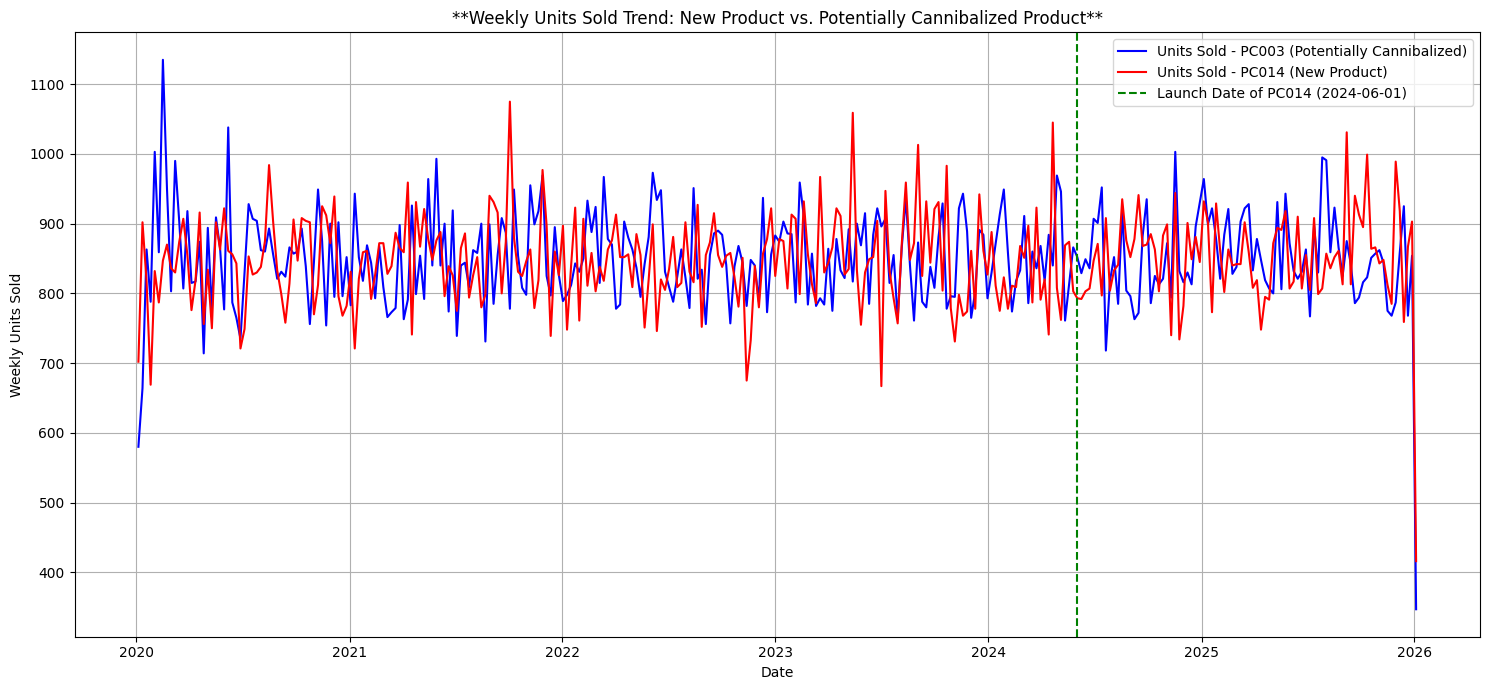


**Interpretasi Visualisasi Kanibalisasi:**
- Plot ini menampilkan tren penjualan mingguan untuk produk baru (PC014) dan produk yang berpotensi dikanibal (PC003).
- Garis vertikal hijau menandai tanggal peluncuran PC014. Kita dapat mengamati perilaku penjualan PC003 sebelum dan sesudah tanggal ini.
- Jika garis biru (PC003) menunjukkan penurunan signifikan setelah garis hijau, sementara garis merah (PC014) menunjukkan peningkatan, ini bisa menjadi indikasi awal kanibalisasi.
- Sebaliknya, jika PC003 tetap stabil atau bahkan meningkat, atau jika PC014 tidak menunjukkan pertumbuhan yang kuat, kanibalisasi mungkin tidak terjadi atau tidak signifikan.
- Penting untuk mempertimbangkan faktor eksternal lain seperti kampanye pemasaran atau kondisi pasar yang dapat mempengaruhi kedua produk.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the new product (PC014) and the potentially cannibalized product (PC003)
new_product_sales = weekly_sales_cannibalization[weekly_sales_cannibalization['product_id'] == new_product_id]
cannibalized_product_sales = weekly_sales_cannibalization[weekly_sales_cannibalization['product_id'] == cannibalized_product_id]

plt.figure(figsize=(15, 7))

# Plot sales for the potentially cannibalized product
sns.lineplot(
    x='date',
    y='units_sold_cleaned',
    data=cannibalized_product_sales,
    label=f'Units Sold - {cannibalized_product_id} (Potentially Cannibalized)',
    color='blue'
)

# Plot sales for the new product
sns.lineplot(
    x='date',
    y='units_sold_cleaned',
    data=new_product_sales,
    label=f'Units Sold - {new_product_id} (New Product)',
    color='red'
)

# Add a vertical line for the launch date of the new product
plt.axvline(
    x=new_product_launch_date,
    color='green',
    linestyle='--',
    label=f'Launch Date of {new_product_id} ({new_product_launch_date.strftime('%Y-%m-%d')})'
)

plt.title('**Weekly Units Sold Trend: New Product vs. Potentially Cannibalized Product**')
plt.xlabel('Date')
plt.ylabel('Weekly Units Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n**Interpretasi Visualisasi Kanibalisasi:**")
print("- Plot ini menampilkan tren penjualan mingguan untuk produk baru (PC014) dan produk yang berpotensi dikanibal (PC003).")
print("- Garis vertikal hijau menandai tanggal peluncuran PC014. Kita dapat mengamati perilaku penjualan PC003 sebelum dan sesudah tanggal ini.")
print("- Jika garis biru (PC003) menunjukkan penurunan signifikan setelah garis hijau, sementara garis merah (PC014) menunjukkan peningkatan, ini bisa menjadi indikasi awal kanibalisasi.")
print("- Sebaliknya, jika PC003 tetap stabil atau bahkan meningkat, atau jika PC014 tidak menunjukkan pertumbuhan yang kuat, kanibalisasi mungkin tidak terjadi atau tidak signifikan.")
print("- Penting untuk mempertimbangkan faktor eksternal lain seperti kampanye pemasaran atau kondisi pasar yang dapat mempengaruhi kedua produk.")

#### **3.2.4 Analisis Kanibalisasi Kuantitatif**

Untuk menguatkan temuan visual dan mengukur dampak kanibalisasi secara numerik, kita akan melakukan analisis kuantitatif dengan membandingkan rata-rata penjualan mingguan (`units_sold_cleaned`) dari produk yang berpotensi dikanibal (`PC003`) selama periode sebelum peluncuran produk baru (`PC014`) dan setelah peluncuran `PC014`.

Metode ini melibatkan langkah-langkah berikut:

1.  **Identifikasi Periode**: Menggunakan periode 'pre-launch' dan 'post-launch' yang telah kita definisikan sebelumnya untuk `PC014`.
2.  **Filter Data**: Hanya menyertakan data penjualan `PC003` selama kedua periode ini dari `weekly_sales_cannibalization`.
3.  **Hitung Rata-rata Mingguan**: Menghitung rata-rata `units_sold_cleaned` mingguan untuk `PC003` di masing-masing periode.
4.  **Bandingkan**: Membandingkan kedua rata-rata tersebut untuk melihat apakah ada penurunan penjualan `PC003` yang signifikan setelah `PC014` diluncurkan.

Perbedaan yang signifikan dalam rata-rata penjualan mingguan `PC003` sebelum dan sesudah peluncuran `PC014` akan memberikan bukti kuantitatif mengenai sejauh mana kanibalisasi terjadi.

In [ ]:
# Filter weekly sales data for the cannibalized product (PC003)
cannibalized_product_weekly_sales = weekly_sales_cannibalization[weekly_sales_cannibalization['product_id'] == cannibalized_product_id]

# Calculate average weekly units sold for PC003 before PC014's launch
average_pre_launch_sales = cannibalized_product_weekly_sales[
    (cannibalized_product_weekly_sales['date'] >= pre_launch_start) &
    (cannibalized_product_weekly_sales['date'] <= pre_launch_end)
]['units_sold_cleaned'].mean()

# Calculate average weekly units sold for PC003 after PC014's launch
average_post_launch_sales = cannibalized_product_weekly_sales[
    (cannibalized_product_weekly_sales['date'] >= post_launch_start) &
    (cannibalized_product_weekly_sales['date'] <= post_launch_end)
]['units_sold_cleaned'].mean()

print(f"Rata-rata penjualan mingguan {cannibalized_product_id} sebelum peluncuran {new_product_id} ({pre_launch_start.strftime('%Y-%m-%d')} - {pre_launch_end.strftime('%Y-%m-%d')}): {average_pre_launch_sales:,.2f} unit")
print(f"Rata-rata penjualan mingguan {cannibalized_product_id} setelah peluncuran {new_product_id} ({post_launch_start.strftime('%Y-%m-%d')} - {post_launch_end.strftime('%Y-%m-%d')}): {average_post_launch_sales:,.2f} unit")

# Calculate the percentage change
if average_pre_launch_sales > 0:
    percentage_change = ((average_post_launch_sales - average_pre_launch_sales) / average_pre_launch_sales) * 100
    print(f"Perubahan rata-rata penjualan mingguan {cannibalized_product_id}: {percentage_change:,.2f}%")
else:
    print("Tidak dapat menghitung perubahan persentase karena rata-rata penjualan pra-peluncuran adalah nol.")

print("\n**Interpretasi:** Angka-angka ini memberikan pengukuran kuantitatif apakah penjualan PC003 mengalami penurunan (atau peningkatan) setelah PC014 diluncurkan. Penurunan persentase yang signifikan akan menjadi indikator kuat adanya kanibalisasi. Penting untuk membandingkan ini dengan tren pasar umum dan aktivitas promosi lainnya.")

Rata-rata penjualan mingguan PC003 sebelum peluncuran PC014 (2023-06-01 - 2024-05-31): 852.12 unit
Rata-rata penjualan mingguan PC003 setelah peluncuran PC014 (2024-06-01 - 2025-05-31): 857.19 unit
Perubahan rata-rata penjualan mingguan PC003: 0.60%

**Interpretasi:** Angka-angka ini memberikan pengukuran kuantitatif apakah penjualan PC003 mengalami penurunan (atau peningkatan) setelah PC014 diluncurkan. Penurunan persentase yang signifikan akan menjadi indikator kuat adanya kanibalisasi. Penting untuk membandingkan ini dengan tren pasar umum dan aktivitas promosi lainnya.
